# HOUSE PRICE PREDICTION

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew
import scipy.special as sc
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, RidgeCV

from sklearn.model_selection import train_test_split

import warnings
from scipy.linalg import LinAlgWarning
warnings.filterwarnings(action='ignore', category=LinAlgWarning, module='sklearn')
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1) Load the 'House Prediction' dataset into a data frame

In [2]:
# Reading the 'House price prediction' dataset

hp_df = pd.read_csv('train.csv', header=0)

In [3]:
# Dimension of the data.

hp_df = hp_df.iloc[:,1:]
print(hp_df.shape)

(1460, 80)


In [4]:
# To check if there is any duplicate values in the data set.

print(hp_df.duplicated().value_counts()) # Output shows that there are no rows duplicated

False    1460
dtype: int64


In [5]:
# Checking datatypes and null values for each feature.

hp_types = hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Let us examine numerical features in the hp_df dataset.

In [6]:
# To get a subset of the DataFrame’s columns based on the column dtypes.
numeric_features = hp_df.select_dtypes(include=[np.number])

numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Let us examine categorical features in the hp_df dataset

In [7]:
# To get a subset of the DataFrame’s columns based on the column dtypes.
categorical_features = hp_df.select_dtypes(include=[np.object])

categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

There are 1460 instances of the data. Total number of attributes equals 81, of which 35 are numerical, 44 are categorical + Id and SalePrice.

Numerical Features: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

Categorical Features: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilitif, Utilities

Now that we have got a general idea about the data set, it’s also a good idea to take a closer look at the data itself. With the help of the head() and tail() functions of the Pandas library, we can easily check out the first and last lines of the DataFrame, respectively.

Let us look at some sample data.

In [8]:
hp_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
hp_df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


# 2) Are there any missing values in the dataset? How to handle that

In [10]:
# To check if there is any missing values for each feature in the 'hp_df' dataframe.

hp_df_missing_val= pd.DataFrame(hp_df.isnull().sum(), columns=['Missing'])
hp_df_missing = hp_df_missing_val[hp_df_missing_val['Missing'] > 0]

hp_df_missing_val= pd.DataFrame(hp_df.isnull().mean()*100,columns=['Missing%'])
hp_df_missing_per = round(hp_df_missing_val[hp_df_missing_val['Missing%'] > 0], 2)

hp_df_missing.join(hp_df_missing_per)

,Missing,Missing%
LotFrontage,259,17.74
Alley,1369,93.77
MasVnrType,8,0.55
MasVnrArea,8,0.55
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtExposure,38,2.60
BsmtFinType1,37,2.53
BsmtFinType2,38,2.60
Electrical,1,0.07


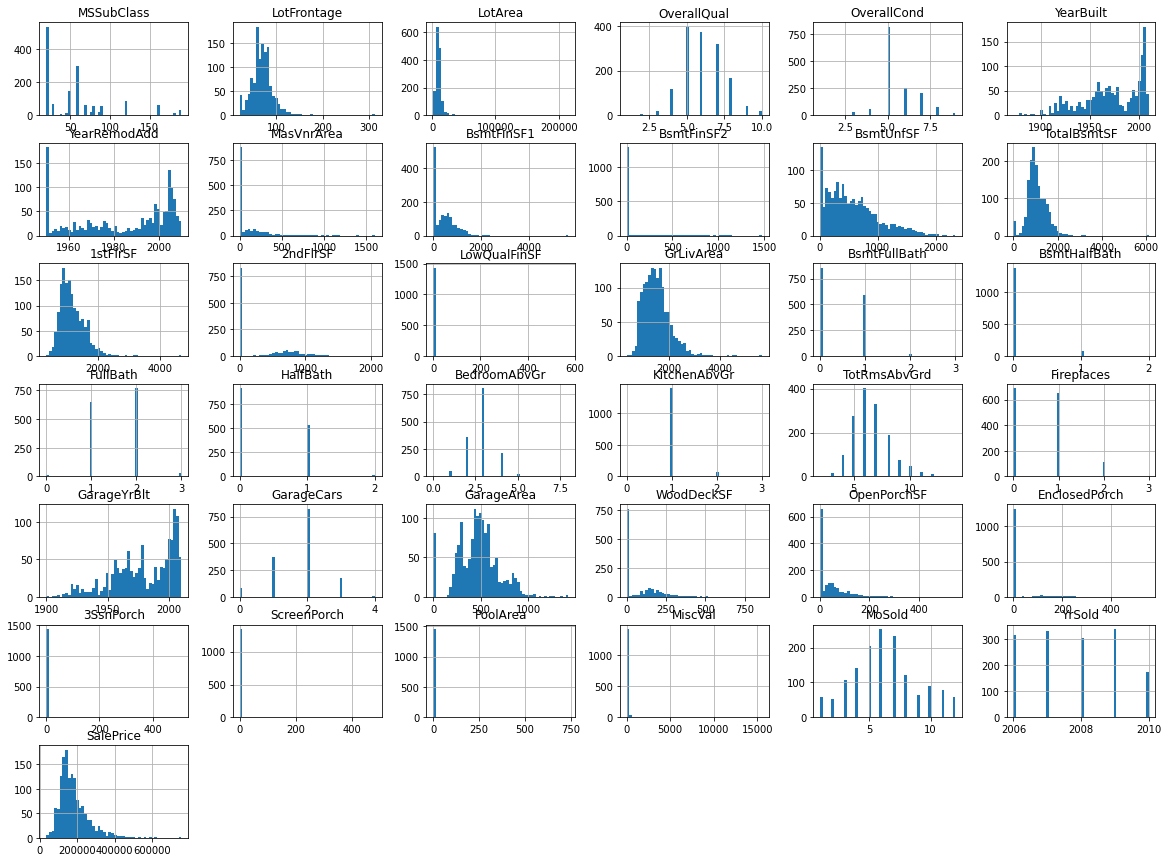

In [11]:
# Approximate data distribution

hp_df.hist(bins = 50, figsize = (20,15))
plt.show()

Exploring Categorical variables using count and count% in factors of categorical variables.

In [12]:
# Taking count of each categorical variable

from pandas import DataFrame

col = categorical_features.columns.values.tolist()
list_var1 = []

for i in range(1,categorical_features.shape[1]):
    DataFrame(list_var1.append(categorical_features[col[i]].value_counts()))
list_var1 = pd.DataFrame(list_var1)

list_var1.index.name = 'var_name1'
list_var1.reset_index(inplace=True)
list_var1


# Reshape data by changing columns into rows based on melt function

list_var_melt = pd.melt(frame = list_var1, id_vars = 'var_name1' , var_name = 'values' , value_name = 'values_count').dropna()
list_var_melt.sort_values(['var_name1', 'values'],inplace=True, ascending=True)
list_var_melt

# To get percentage from each categorical groups

val_sum = list_var_melt.groupby(['var_name1', 'values']).agg({'values_count': 'sum'})
val_per = val_sum.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

val_per['values_count1'] = list_var_melt.iloc[:,2].values
hp_df_cat_summary = val_per.iloc[:,[1,0]]
hp_df_cat_summary.columns = ['value_count', 'values%']
hp_df_cat_summary

value_count    values%
var_name1 values                        
Alley     Grvl           50.0  54.945055
          Pave           41.0  45.054945
BldgType  1Fam         1220.0  83.561644
          2fmCon         31.0   2.123288
          Duplex         52.0   3.561644
...                       ...        ...
SaleType  WD           1267.0  86.780822
Street    Grvl            6.0   0.410959
          Pave         1454.0  99.589041
Utilities AllPub       1459.0  99.931507
          NoSeWa          1.0   0.068493

[247 rows x 2 columns]

In [13]:
hp_df_cat_summary.to_csv('hp_df_cat_summary.csv')

### Handle missing values for features where median/mean/multiple imputation/regression based imputation or most common value doesn't make sense in every scenario. The blind imputation will cause drastic distribution changes in the dataset. So, we need to understand the data thoroughhly before imputing the missing values.

In [14]:
# Alley : data description says NA means "no alley access"
hp_df.loc[:, "Alley"] = hp_df.loc[:, "Alley"].fillna("No")

# BedroomAbvGr : NA most likely means 0
hp_df.loc[:, "BedroomAbvGr"] = hp_df.loc[:, "BedroomAbvGr"].fillna(0)

# BsmtQual etc : data description says NA for basement features is "no basement"
hp_df.loc[:, "BsmtQual"] = hp_df.loc[:, "BsmtQual"].fillna("No")
hp_df.loc[:, "BsmtCond"] = hp_df.loc[:, "BsmtCond"].fillna("No")
hp_df.loc[:, "BsmtExposure"] = hp_df.loc[:, "BsmtExposure"].fillna("No")
hp_df.loc[:, "BsmtFinType1"] = hp_df.loc[:, "BsmtFinType1"].fillna("No")
hp_df.loc[:, "BsmtFinType2"] = hp_df.loc[:, "BsmtFinType2"].fillna("No")
hp_df.loc[:, "BsmtFullBath"] = hp_df.loc[:, "BsmtFullBath"].fillna(0)
hp_df.loc[:, "BsmtHalfBath"] = hp_df.loc[:, "BsmtHalfBath"].fillna(0)
hp_df.loc[:, "BsmtUnfSF"] = hp_df.loc[:, "BsmtUnfSF"].fillna(0)

# CentralAir : NA most likely means No
hp_df.loc[:, "CentralAir"] = hp_df.loc[:, "CentralAir"].fillna("No")

# Condition : NA most likely means Normal
hp_df.loc[:, "Condition1"] = hp_df.loc[:, "Condition1"].fillna("Norm")
hp_df.loc[:, "Condition2"] = hp_df.loc[:, "Condition2"].fillna("Norm")

# EnclosedPorch : NA most likely means no enclosed porch
hp_df.loc[:, "EnclosedPorch"] = hp_df.loc[:, "EnclosedPorch"].fillna(0)

# External stuff : NA most likely means average
hp_df.loc[:, "ExterCond"] = hp_df.loc[:, "ExterCond"].fillna("TA")
hp_df.loc[:, "ExterQual"] = hp_df.loc[:, "ExterQual"].fillna("TA")

# Electrical : data description says NA means "Mix"
hp_df.loc[:, "Electrical"] = hp_df.loc[:, "Electrical"].fillna("Mix")

# Fence : data description says NA means "no fence"
hp_df.loc[:, "Fence"] = hp_df.loc[:, "Fence"].fillna("No")

# FireplaceQu : data description says NA means "no fireplace"
hp_df.loc[:, "FireplaceQu"] = hp_df.loc[:, "FireplaceQu"].fillna("No")
hp_df.loc[:, "Fireplaces"] = hp_df.loc[:, "Fireplaces"].fillna(0)

# Functional : data description says NA means typical
hp_df.loc[:, "Functional"] = hp_df.loc[:, "Functional"].fillna("Typ")

# GarageType etc : data description says NA for garage features is "no garage"
hp_df.loc[:, "GarageType"] = hp_df.loc[:, "GarageType"].fillna("No")
hp_df.loc[:, "GarageYrBlt"] = hp_df.loc[:, "GarageYrBlt"].fillna("No")
hp_df.loc[:, "GarageFinish"] = hp_df.loc[:, "GarageFinish"].fillna("No")
hp_df.loc[:, "GarageQual"] = hp_df.loc[:, "GarageQual"].fillna("No")
hp_df.loc[:, "GarageCond"] = hp_df.loc[:, "GarageCond"].fillna("No")
hp_df.loc[:, "GarageArea"] = hp_df.loc[:, "GarageArea"].fillna(0)
hp_df.loc[:, "GarageCars"] = hp_df.loc[:, "GarageCars"].fillna(0)

# HalfBath : NA most likely means no half baths above grade
hp_df.loc[:, "HalfBath"] = hp_df.loc[:, "HalfBath"].fillna(0)

# HeatingQC : NA most likely means typical
hp_df.loc[:, "HeatingQC"] = hp_df.loc[:, "HeatingQC"].fillna("TA")

# KitchenAbvGr : NA most likely means 0
hp_df.loc[:, "KitchenAbvGr"] = hp_df.loc[:, "KitchenAbvGr"].fillna(0)

# KitchenQual : NA most likely means typical
hp_df.loc[:, "KitchenQual"] = hp_df.loc[:, "KitchenQual"].fillna("TA")

# LotFrontage : NA most likely means no lot frontage
hp_df.loc[:, "LotFrontage"] = hp_df.loc[:, "LotFrontage"].fillna(0)

# LotShape : NA most likely means regular
hp_df.loc[:, "LotShape"] = hp_df.loc[:, "LotShape"].fillna("Reg")

# MasVnrType : NA most likely means no veneer
hp_df.loc[:, "MasVnrType"] = hp_df.loc[:, "MasVnrType"].fillna("None")
hp_df.loc[:, "MasVnrArea"] = hp_df.loc[:, "MasVnrArea"].fillna(0)

# MiscFeature : data description says NA means "no misc feature"
hp_df.loc[:, "MiscFeature"] = hp_df.loc[:, "MiscFeature"].fillna("No")
hp_df.loc[:, "MiscVal"] = hp_df.loc[:, "MiscVal"].fillna(0)

# OpenPorchSF : NA most likely means no open porch
hp_df.loc[:, "OpenPorchSF"] = hp_df.loc[:, "OpenPorchSF"].fillna(0)

# PavedDrive : NA most likely means not paved
hp_df.loc[:, "PavedDrive"] = hp_df.loc[:, "PavedDrive"].fillna("No")

# PoolQC : data description says NA means "no pool"
hp_df.loc[:, "PoolQC"] = hp_df.loc[:, "PoolQC"].fillna("No")
hp_df.loc[:, "PoolArea"] = hp_df.loc[:, "PoolArea"].fillna(0)

# SaleCondition : NA most likely means normal sale
hp_df.loc[:, "SaleCondition"] = hp_df.loc[:, "SaleCondition"].fillna("Normal")

# ScreenPorch : NA most likely means no screen porch
hp_df.loc[:, "ScreenPorch"] = hp_df.loc[:, "ScreenPorch"].fillna(0)

# TotRmsAbvGrd : NA most likely means 0
hp_df.loc[:, "TotRmsAbvGrd"] = hp_df.loc[:, "TotRmsAbvGrd"].fillna(0)

# Utilities : NA most likely means all public utilities
hp_df.loc[:, "Utilities"] = hp_df.loc[:, "Utilities"].fillna("AllPub")

# WoodDeckSF : NA most likely means no wood deck
hp_df.loc[:, "WoodDeckSF"] = hp_df.loc[:, "WoodDeckSF"].fillna(0)

After handling missing values, we check to see if there is any missing value present in the hp_df dataset.

In [15]:
hp_df_missing_val= pd.DataFrame(hp_df.isnull().sum(), columns=['Missing'])
hp_df_missing_val[hp_df_missing_val['Missing'] > 0]

,Missing


We can see that there are no missing values in the hp_df dataset.

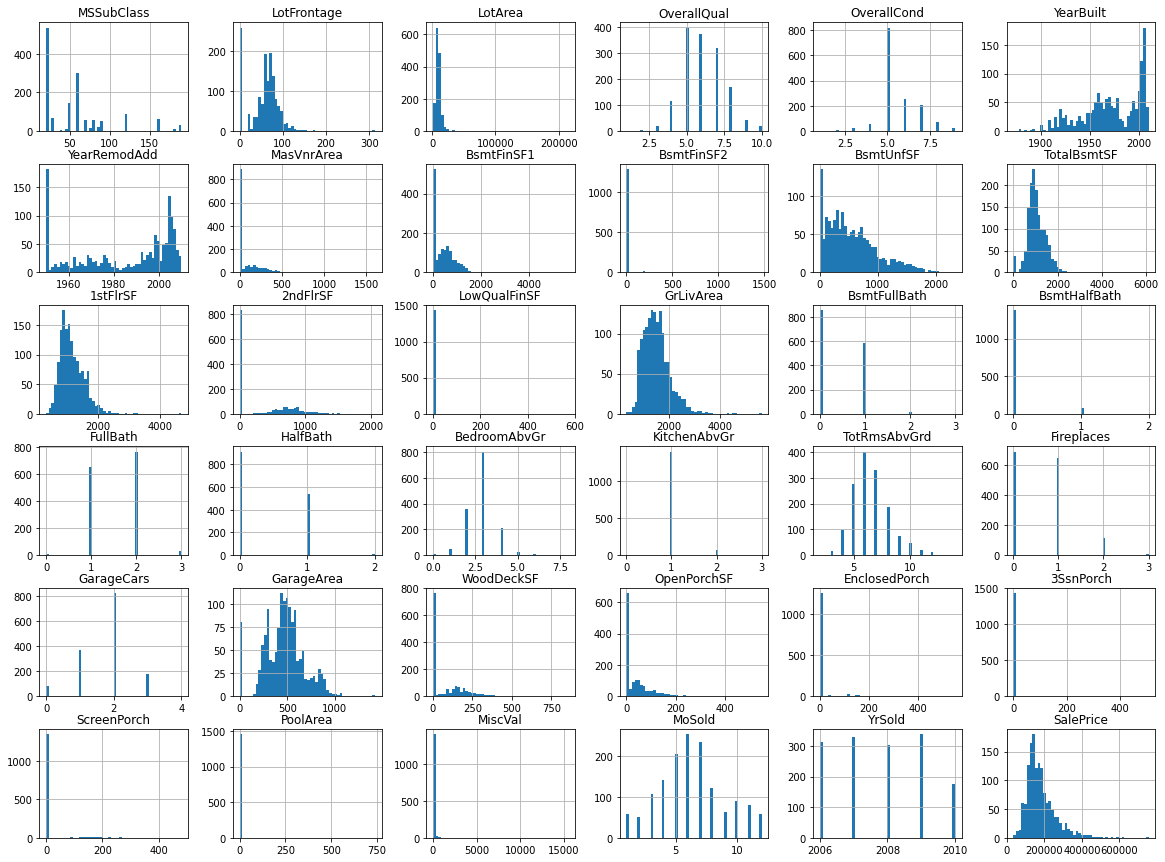

In [16]:
# Approximate data distribution

hp_df.hist(bins = 50, figsize = (20,15))
plt.show()

# 3) Use a measure of central tendency for each feature.

The measure of central tendency is mean, median and mode.

In [17]:
# Caluclating the mean, median and mode of each feature.

hp_describe = hp_df.iloc[:,1:].describe().T
hp_describe_mode = hp_df.iloc[:,1:].mode().T

hp_df_ct = hp_describe[['mean', '50%']].join(hp_describe_mode)
hp_df_ct.columns = ['mean', 'median', 'mode']
hp_df_ct

,mean,median,mode
LotFrontage,57.623288,63.0,0.0
LotArea,10516.828082,9478.5,7200
OverallQual,6.099315,6.0,5
OverallCond,5.575342,5.0,5
YearBuilt,1971.267808,1973.0,2006
YearRemodAdd,1984.865753,1994.0,1950
MasVnrArea,103.117123,0.0,0.0
BsmtFinSF1,443.639726,383.5,0
BsmtFinSF2,46.549315,0.0,0
BsmtUnfSF,567.240411,477.5,0


# 4) Show the dispersion (standard deviation and IQR) of features.

Since it is a time-consuming process to calculate the measure of central tendency, measure of dispersion, quartiles, IQR and other descreptive statsitics for each features. So, we have created a 'descriptive_stats()'.

#### The custom Python function 'descriptive_stats()' gives the following descriptive statistics

        1) Data type
        2) Count
        3) Null values
        4) Missing %
        5) Minimum
        6) Quartile 1
        7) Mean
        8) Median
        9) mode
        10) Quartile 3
        11) Maximum
        12) Inter Quartile Range (IQR)
        13) IQR lower
        14) IQR upper
        15) Standard Deviation
        16) Skewness
        17) Kurtosis   

In [18]:
def descriptive_stats(df):
    
    obs = df.shape[0]
    types = df.dtypes
    count = df.apply(lambda x: x.count())
    nulls = df.apply(lambda x: x.isnull().sum())
    missing_ration = (df.isnull().sum()/ obs) * 100
    minimum = df.min(axis = 0)
    Q1 = df.quantile(q=0.25, axis = 0)
    mean = df.mean()
    median = df.median()
    mode = df.mode().T
    Q3 = df.quantile(q=0.75, axis = 0)
    maximum = df.max(axis = 0)
    IQR = Q3-Q1
    IQR_lower = Q1 - 1.5 * IQR
    IQR_upper = Q3 + 1.5 * IQR
    stdev = df.std()
    skewness = df.skew()
    kurtosis = df.kurt() 
    
    cols = ['types', 'count', 'missing count', 'missing %', 'min', 'Q1', 'mean', 'median', 'mode', 'Q3', 'max', 'IQR', 'IQR_lower', 'IQR_upper', 'stdev', 'skewness', 'kurtosis']
    desr = pd.concat([types, count, nulls, missing_ration, minimum, Q1, mean, median, mode, Q3, maximum, IQR, IQR_lower, IQR_upper, stdev, skewness, kurtosis], axis = 1)
    desr.columns = cols
    return desr

hp_df_descr_stats = descriptive_stats(hp_df)
hp_df_descr_stats.sort_values('types')

hp_df_descr_stats.to_csv("hp_df_descr_stats.csv")
hp_df_descr_stats

,types,count,missing count,missing %,min,Q1,mean,median,mode,Q3,max,IQR,IQR_lower,IQR_upper,stdev,skewness,kurtosis
MSSubClass,int64,1460,0,0.0,20,20.0,56.897260,50.0,20,70.0,190,50.0,-55.0,145.0,42.300571,1.407657,1.580188
MSZoning,object,1460,0,0.0,C (all),NaN,NaN,NaN,RL,NaN,RM,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,float64,1460,0,0.0,0.0,42.0,57.623288,63.0,0.0,79.0,313.0,37.0,-13.5,134.5,34.664304,0.267822,3.610678
LotArea,int64,1460,0,0.0,1300,7553.5,10516.828082,9478.5,7200,11601.5,215245,4048.0,1481.5,17673.5,9981.264932,12.207688,203.243271
Street,object,1460,0,0.0,Grvl,NaN,NaN,NaN,Pave,NaN,Pave,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,int64,1460,0,0.0,1,5.0,6.321918,6.0,6,8.0,12,3.0,0.5,12.5,2.703626,0.212053,-0.404109
YrSold,int64,1460,0,0.0,2006,2007.0,2007.815753,2008.0,2009,2009.0,2010,2.0,2004.0,2012.0,1.328095,0.096269,-1.190601
SaleType,object,1460,0,0.0,COD,NaN,NaN,NaN,WD,NaN,WD,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,object,1460,0,0.0,Abnorml,NaN,NaN,NaN,Normal,NaN,Partial,NaN,NaN,NaN,NaN,NaN,NaN


## Variable Transformation

Variable transformation is a way to make the data work better in your model. There are two types of variable transformation:

1. Numerical  Variable Transformation
2. Categorical Variable Transformation

Numeric Variable Transformation is meant to change the scale of values and/or to adjust the skewed data distribution to Gaussian-like distribution. 

Categorical Variable Transformation is turning a categorical variable to a numeric variable. Categorical variable transformation is mandatory for most of the machine learning models because they can handle only numeric values. It is also called encoding.

In [19]:
# Differentiate numerical features (minus the target) and categorical features after variable transformation

categorical_features = hp_df.select_dtypes(include = ["object"]).columns
numerical_features = hp_df.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

print("Numerical features : " + str(numerical_features))
print("Categorical features : " + str(categorical_features))

hp_df_num = hp_df[numerical_features]
hp_df_cat = hp_df[categorical_features]

Numerical features : 35
Categorical features : 44
Numerical features : Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Categorical features : Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtEx

### 1. Numerical  Variable Transformation

Plotting distribution of the traget variable 'SalesPrice'.


 mu = 180921.20 and sigma = 79415.29

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


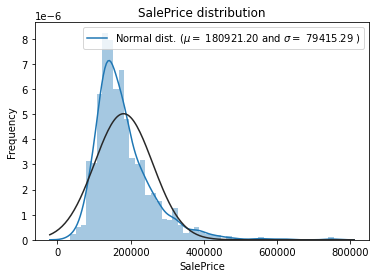

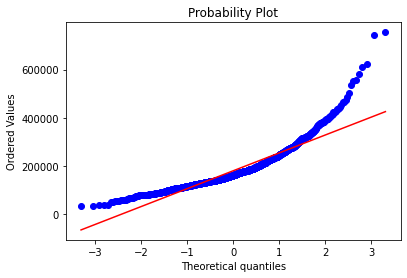

In [20]:
sns.distplot(hp_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(hp_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

print(hp_df['SalePrice'].describe())

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(hp_df['SalePrice'], plot=plt)
plt.show() 

It is clearly evident fr om the above 'histogram' and 'probability plot' that the 'SalesPrice' is not normal and follows a positively skewed distribution. So we need to transform the variable using 'Log' to make the distribution to normal.


 mu = 12.02 and sigma = 0.40

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64


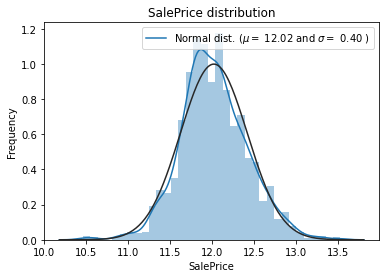

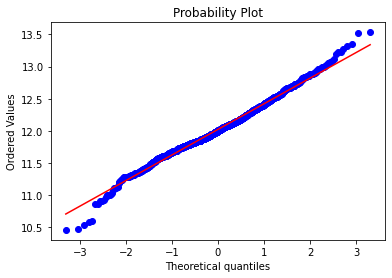

In [21]:
# Log transform the target for official scoring
hp_df.SalePrice = np.log1p(hp_df.SalePrice)

sns.distplot(hp_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(hp_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

print(hp_df['SalePrice'].describe())

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(hp_df['SalePrice'], plot=plt)
plt.show() 

Now the target variable 'Log(SalesPrice)' follows a normal distribution.  

### Log transform of the skewed numerical features

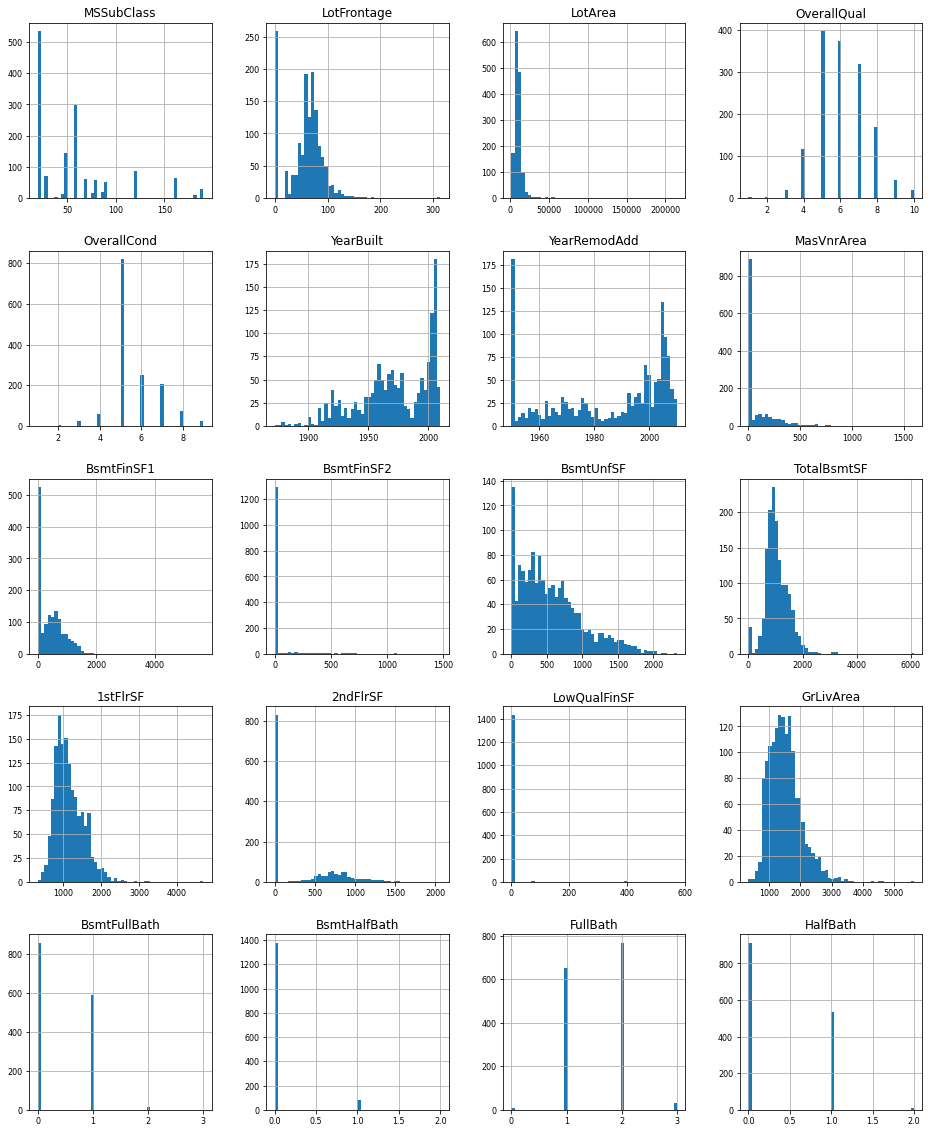

In [22]:
hp_df_num.iloc[:,0:20].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

We can observe that some of the variables are skewed distribution in 'hp_df'. 

For example, 'LotArea'.

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


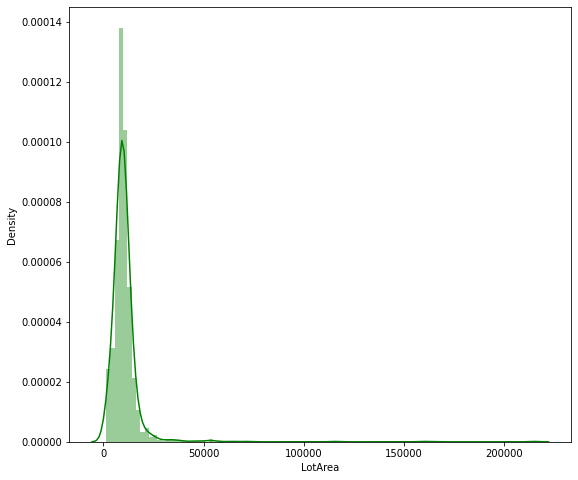

In [23]:
print(hp_df['LotArea'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(hp_df['LotArea'], color='g', bins=100, hist_kws={'alpha': 0.4});

We can see that the 'LotArea' is positively skewed.

### Transforming positively skewed independent variables to normal using Log Transformation

In [24]:
skewness = hp_df_num.skew()

skewness_positive = skewness[abs(skewness) > 0.5]

print(str(skewness_positive.shape[0]) + " positively skewed numerical features to log transform")
print("positively skewed features are")
print(skewness_positive.index)

skewed_positive_features = skewness_positive.index
hp_df[skewed_positive_features] = np.log1p(hp_df[skewed_positive_features])

27 positively skewed numerical features to log transform
positively skewed features are
Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')


After transformation we are just checking to see if the 'LotArea' has been changed to normal distribution. 

count    1460.000000
mean        9.110966
std         0.517369
min         7.170888
25%         8.929898
50%         9.156887
75%         9.358976
max        12.279537
Name: LotArea, dtype: float64


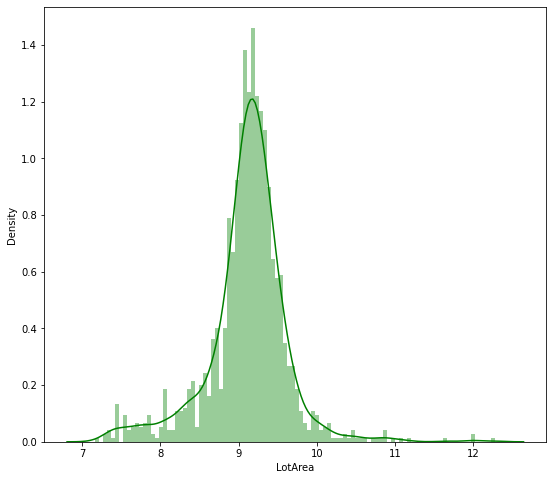

In [25]:
print(hp_df['LotArea'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(hp_df['LotArea'], color='g', bins=100, hist_kws={'alpha': 0.4});

From the above plot, the 'LotArea' has become almost a normal distribution.

#### Transforming the negatively skewed distributed variables to normal using exponential transformation.

In [26]:
skewness = hp_df_num.skew()

skewness_negative = skewness[abs(skewness) <= -0.5]
print(str(skewness_negative.shape[0]) + " skewed numerical features to log transform")
skewed_negative_features = skewness_negative.index

# hp_df[skewed_negative_features] = np.exp1p(hp_df[skewed_negative_features])

0 skewed numerical features to log transform


### 2. Categorical Variable Transformation

Encode some categorical features as ordered numbers when there is information in the order.

In [27]:
hp_df = hp_df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2, "No" : 3},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

Then we are transforming the categorical features in the following 3 ways:

    1) Simplifications of existing features

    2) Combinations of existing features

    3) Polynomials on the top 10 existing features

### Create new categorical features and encoding

#### 1. Simplifications of existing features

In [28]:
hp_df["SimplOverallQual"] = hp_df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })

hp_df["SimplOverallCond"] = hp_df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })

hp_df["SimplPoolQC"] = hp_df.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })

hp_df["SimplGarageCond"] = hp_df.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1,
                                                     4 : 2, 5 : 2 # good
                                                    })

hp_df["SimplGarageQual"] = hp_df.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1,
                                                     4 : 2, 5 : 2 # good
                                                    })

hp_df["SimplFireplaceQu"] = hp_df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, 
                                                       4 : 2, 5 : 2 # good
                                                      })

hp_df["SimplFireplaceQu"] = hp_df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, 
                                                       4 : 2, 5 : 2 # good
                                                      })

hp_df["SimplFunctional"] = hp_df.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })

hp_df["SimplKitchenQual"] = hp_df.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, 
                                                       4 : 2, 5 : 2 # good
                                                      })

hp_df["SimplHeatingQC"] = hp_df.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1,
                                                   4 : 2, 5 : 2 # good
                                                  })

hp_df["SimplBsmtFinType1"] = hp_df.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })

hp_df["SimplBsmtFinType2"] = hp_df.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })

hp_df["SimplBsmtCond"] = hp_df.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1,
                                                 4 : 2, 5 : 2 # good
                                                })

hp_df["SimplBsmtQual"] = hp_df.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1,
                                                 4 : 2, 5 : 2 # good
                                                })

hp_df["SimplExterCond"] = hp_df.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, 
                                                   4 : 2, 5 : 2 # good
                                                  })
hp_df["SimplExterQual"] = hp_df.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, 
                                                   4 : 2, 5 : 2 # good
                                                  })

#### 2. Combinations of existing features

In [29]:
# Overall quality of the house

hp_df["OverallGrade"] = hp_df["OverallQual"] *  hp_df["OverallCond"]

# Overall quality of the garage
hp_df["GarageGrade"] = hp_df["GarageQual"] * hp_df["GarageCond"]

# Overall quality of the exterior
hp_df["ExterGrade"] = hp_df["ExterQual"] * hp_df["ExterCond"]

# Overall kitchen score
hp_df["KitchenScore"] = hp_df["KitchenAbvGr"] * hp_df["KitchenQual"]

# Overall fireplace score
hp_df["FireplaceScore"] = hp_df["Fireplaces"] * hp_df["FireplaceQu"]

# Overall garage score
hp_df["GarageScore"] = hp_df["GarageArea"] * hp_df["GarageQual"]

# Overall pool score
hp_df["PoolScore"] = hp_df["PoolArea"] * hp_df["PoolQC"]

# Simplified overall quality of the house
hp_df["SimplOverallGrade"] = hp_df["SimplOverallQual"] * hp_df["SimplOverallCond"]

# Simplified overall quality of the exterior
hp_df["SimplExterGrade"] = hp_df["SimplExterQual"] * hp_df["SimplExterCond"]

# Simplified overall pool score
hp_df["SimplPoolScore"] = hp_df["PoolArea"] * hp_df["SimplPoolQC"]

# Simplified overall garage score
hp_df["SimplGarageScore"] = hp_df["GarageArea"] * hp_df["SimplGarageQual"]

# Simplified overall fireplace score
hp_df["SimplFireplaceScore"] = hp_df["Fireplaces"] * hp_df["SimplFireplaceQu"]

# Simplified overall kitchen score
hp_df["SimplKitchenScore"] = hp_df["KitchenAbvGr"] * hp_df["SimplKitchenQual"]

# Total number of bathrooms
hp_df["TotalBath"] = hp_df["BsmtFullBath"] + (0.5 * hp_df["BsmtHalfBath"]) + hp_df["FullBath"] + (0.5 * hp_df["HalfBath"])

# Total SF for house (incl. basement)
hp_df["AllSF"] = hp_df["GrLivArea"] + hp_df["TotalBsmtSF"]

# Total SF for 1st + 2nd floors
hp_df["AllFlrsSF"] = hp_df["1stFlrSF"] + hp_df["2ndFlrSF"]

hp_df["AllPorchSF"] = hp_df["OpenPorchSF"] + hp_df["EnclosedPorch"] + hp_df["3SsnPorch"] + hp_df["ScreenPorch"]

# Has masonry veneer or not
hp_df["HasMasVnr"] = hp_df.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})

# House completed before sale or not
hp_df["BoughtOffPlan"] = hp_df.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})


#### Find most important features relative to target

In [30]:
print("Find most important features relative to target variable 'sales price'")
corr = hp_df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr.SalePrice

Find most important features relative to target variable 'sales price'


SalePrice           1.000000
OverallQual         0.817185
OverallGrade        0.776148
GrLivArea           0.730254
SimplOverallQual    0.706083
                      ...   
LowQualFinSF       -0.054513
MiscVal            -0.067054
KitchenAbvGr       -0.144278
EnclosedPorch      -0.207263
LotShape           -0.286002
Name: SalePrice, Length: 90, dtype: float64

#### 3. Polynomials on the top 10 existing features

In [31]:
hp_df["OverallQual-s2"] = hp_df["OverallQual"] ** 2
hp_df["OverallQual-s3"] = hp_df["OverallQual"] ** 3
hp_df["OverallQual-Sq"] = np.sqrt(hp_df["OverallQual"])

hp_df["AllSF-2"] = hp_df["AllSF"] ** 2
hp_df["AllSF-3"] = hp_df["AllSF"] ** 3
hp_df["AllSF-Sq"] = np.sqrt(hp_df["AllSF"])

hp_df["AllFlrsSF-2"] = hp_df["AllFlrsSF"] ** 2
hp_df["AllFlrsSF-3"] = hp_df["AllFlrsSF"] ** 3
hp_df["AllFlrsSF-Sq"] = np.sqrt(hp_df["AllFlrsSF"])

hp_df["GrLivArea-2"] = hp_df["GrLivArea"] ** 2
hp_df["GrLivArea-3"] = hp_df["GrLivArea"] ** 3
hp_df["GrLivArea-Sq"] = np.sqrt(hp_df["GrLivArea"])

hp_df["SimplOverallQual-s2"] = hp_df["SimplOverallQual"] ** 2
hp_df["SimplOverallQual-s3"] = hp_df["SimplOverallQual"] ** 3
hp_df["SimplOverallQual-Sq"] = np.sqrt(hp_df["SimplOverallQual"])

hp_df["ExterQual-2"] = hp_df["ExterQual"] ** 2
hp_df["ExterQual-3"] = hp_df["ExterQual"] ** 3
hp_df["ExterQual-Sq"] = np.sqrt(hp_df["ExterQual"])

hp_df["GarageCars-2"] = hp_df["GarageCars"] ** 2
hp_df["GarageCars-3"] = hp_df["GarageCars"] ** 3
hp_df["GarageCars-Sq"] = np.sqrt(hp_df["GarageCars"])

hp_df["TotalBath-2"] = hp_df["TotalBath"] ** 2
hp_df["TotalBath-3"] = hp_df["TotalBath"] ** 3
hp_df["TotalBath-Sq"] = np.sqrt(hp_df["TotalBath"])

hp_df["KitchenQual-2"] = hp_df["KitchenQual"] ** 2
hp_df["KitchenQual-3"] = hp_df["KitchenQual"] ** 3
hp_df["KitchenQual-Sq"] = np.sqrt(hp_df["KitchenQual"])

hp_df["GarageScore-2"] = hp_df["GarageScore"] ** 2
hp_df["GarageScore-3"] = hp_df["GarageScore"] ** 3
hp_df["GarageScore-Sq"] = np.sqrt(hp_df["GarageScore"])

In [32]:
# After variable transformation, differentiate numerical features (minus the target) and categorical features 

categorical_features = hp_df.select_dtypes(include = ["object"]).columns
numerical_features = hp_df.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

print("Numerical features : " + str(numerical_features))
print("Categorical features : " + str(categorical_features))

hp_df_num = hp_df[numerical_features]
hp_df_cat = hp_df[categorical_features]

Numerical features : 119
Categorical features : 24
Numerical features : Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       ...
       'GarageCars-Sq', 'TotalBath-2', 'TotalBath-3', 'TotalBath-Sq',
       'KitchenQual-2', 'KitchenQual-3', 'KitchenQual-Sq', 'GarageScore-2',
       'GarageScore-3', 'GarageScore-Sq'],
      dtype='object', length=119)
Categorical features : Index(['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


# 5) Outlier Detection and Handling

Using the IQR_upper and IQR_lower values obtained from quartiles and inter-quartile range

    1. any outliers greater than IQR_upper are updated to be equal to IQR_upper
    2. any outliers lesser than IQR_lower are updated to be equal to IQR_lower
    
Here, no outliers have been removed from the hp_df dataset to prevent the loss of data as we have only 1460 observations to  predict 'Salesprice'

In [33]:
def remove_outliers(x):
    ## storing names of columns in Column_Names
    Column_Names=x.columns 

    ## iterating through Column_Names using try and except for distinguishing between numerical and categorical columns
    for j in Column_Names:
        try:
            print('Before Removing Outliers')
    
            ##visualisation of outliers
            a = sns.boxplot(data=x,x=x[j])
            plt.tight_layout() 
            plt.show() 
    
            xy=x[j]    
            mydata=pd.DataFrame()
    
            updated=[]
            Q1,Q3=np.percentile(xy,[25,75])
            IQR=Q3-Q1
            minimum=Q1-1.5*IQR
            maximum=Q3+1.5*IQR
    
            for i in xy:
                if(i>maximum):
                    i=maximum
                    updated.append(i)
                elif(i<minimum):
                    i=minimum
                    updated.append(i)
                else:
                    updated.append(i)

            x[j]=updated
            print('After Removing Outliers')

            ## visualising after removing outliers
            b = sns.boxplot(data=x,x=x[j])
            plt.tight_layout() 
            plt.show()

        except:
            continue
    return x

Before Removing Outliers


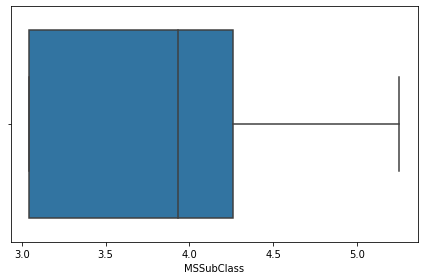

After Removing Outliers


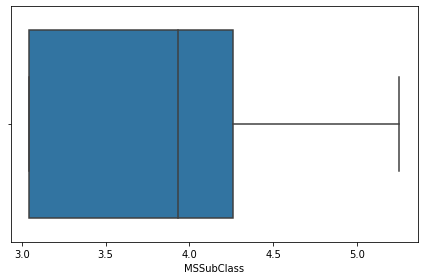

Before Removing Outliers


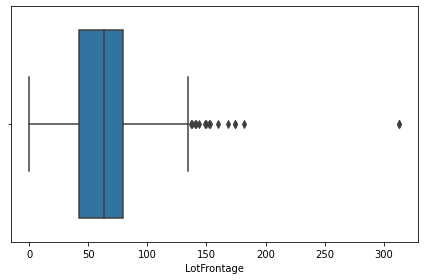

After Removing Outliers


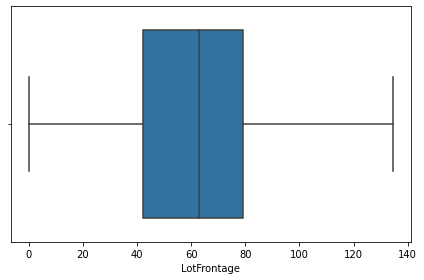

Before Removing Outliers


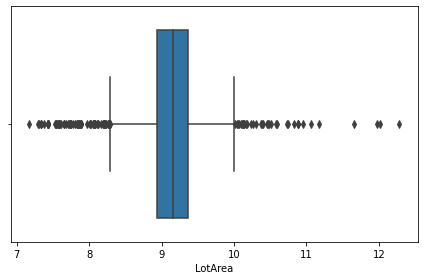

After Removing Outliers


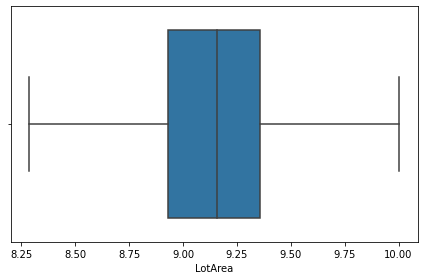

Before Removing Outliers


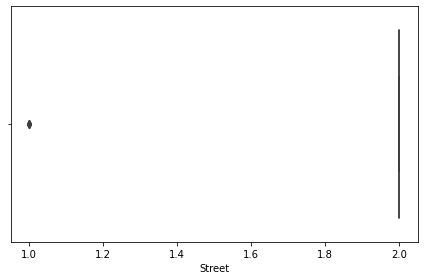

After Removing Outliers


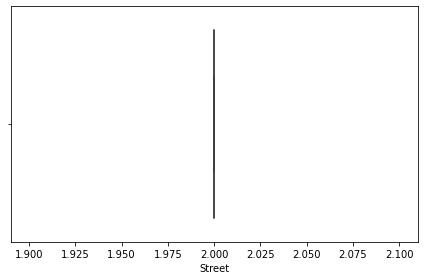

Before Removing Outliers


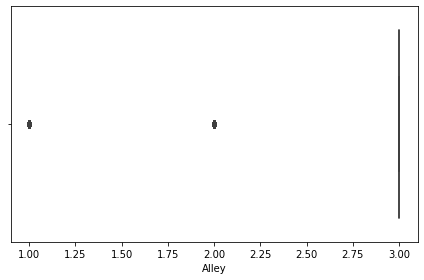

After Removing Outliers


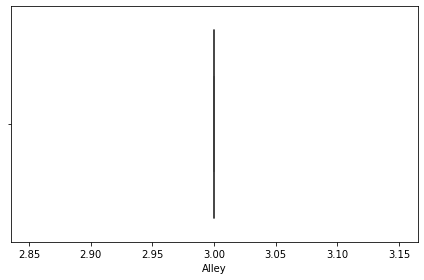

Before Removing Outliers


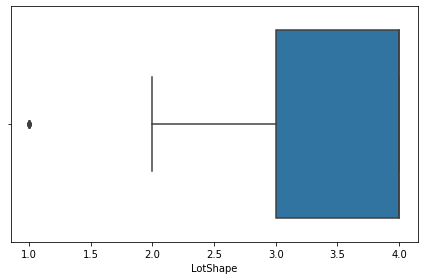

After Removing Outliers


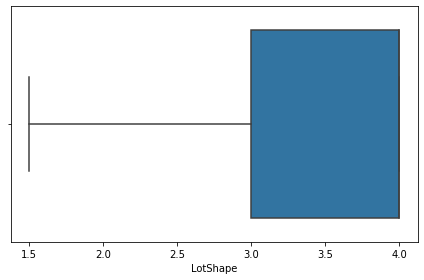

Before Removing Outliers


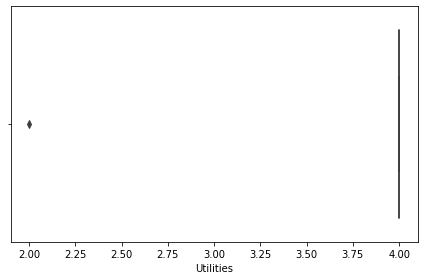

After Removing Outliers


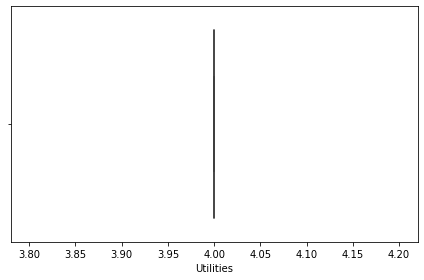

Before Removing Outliers


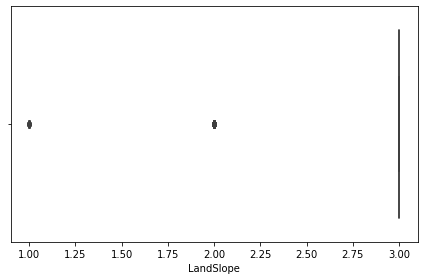

After Removing Outliers


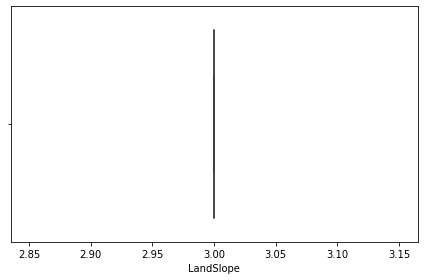

Before Removing Outliers


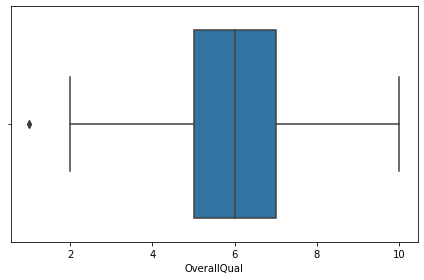

After Removing Outliers


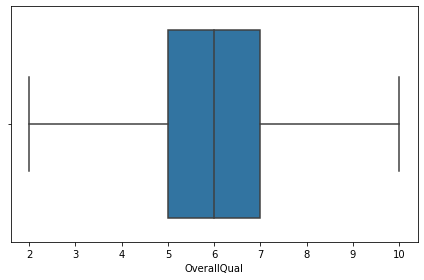

Before Removing Outliers


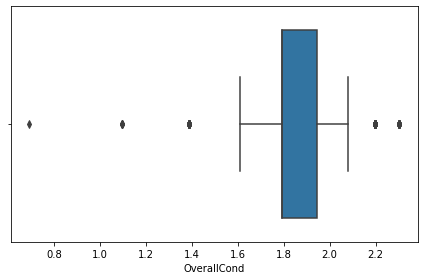

After Removing Outliers


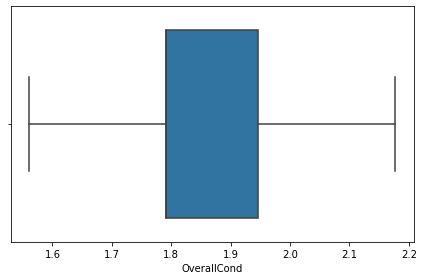

Before Removing Outliers


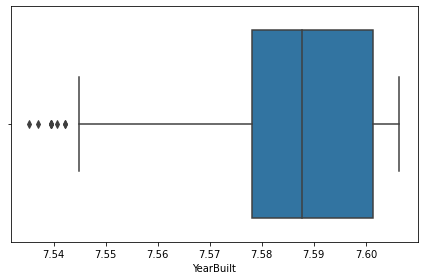

After Removing Outliers


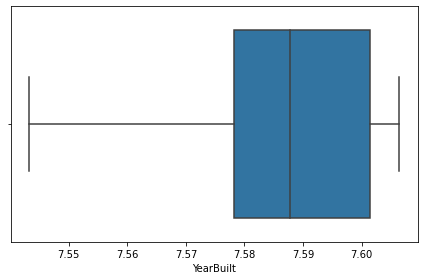

Before Removing Outliers


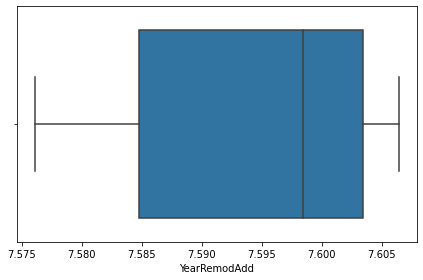

After Removing Outliers


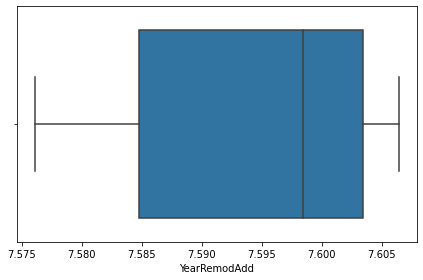

Before Removing Outliers


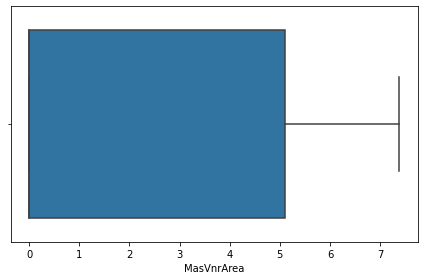

After Removing Outliers


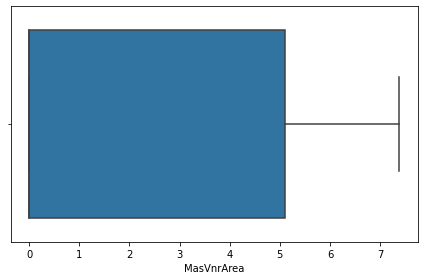

Before Removing Outliers


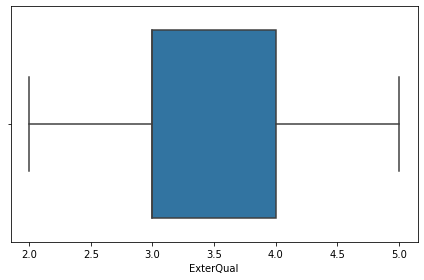

After Removing Outliers


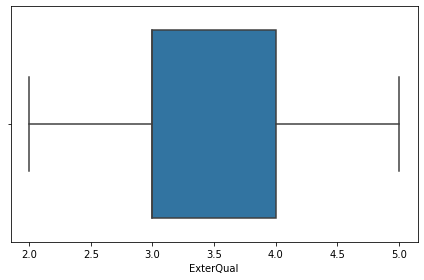

Before Removing Outliers


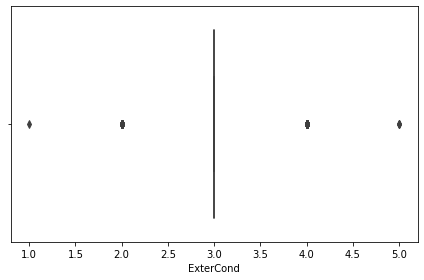

After Removing Outliers


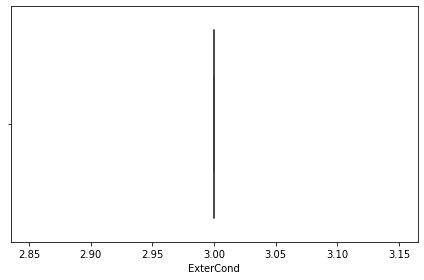

Before Removing Outliers


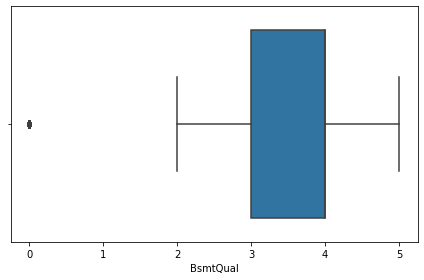

After Removing Outliers


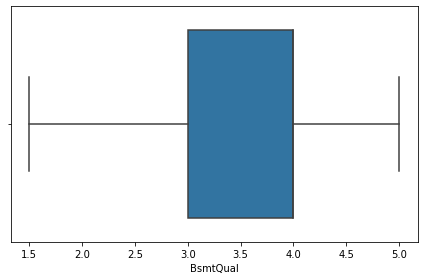

Before Removing Outliers


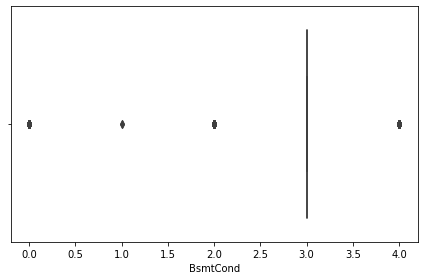

After Removing Outliers


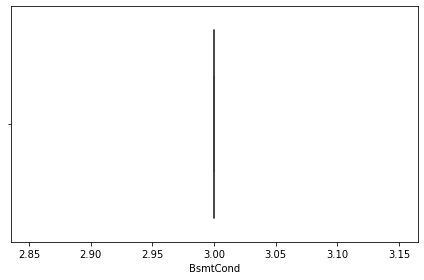

Before Removing Outliers


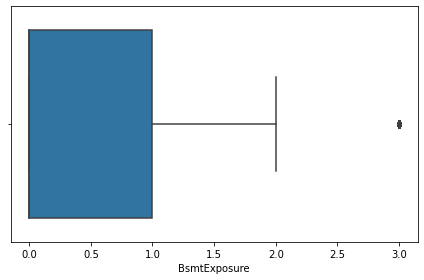

After Removing Outliers


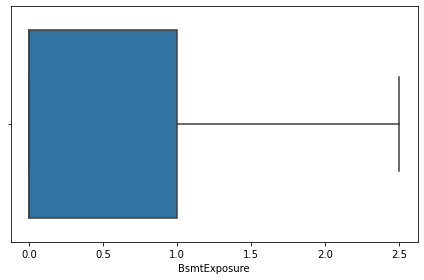

Before Removing Outliers


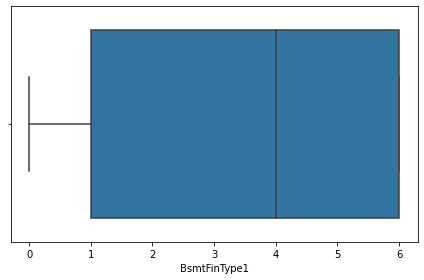

After Removing Outliers


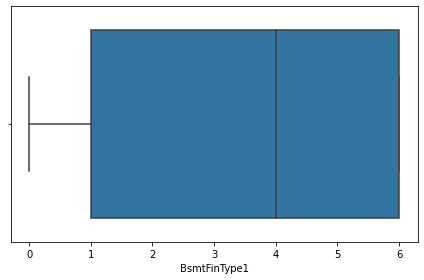

Before Removing Outliers


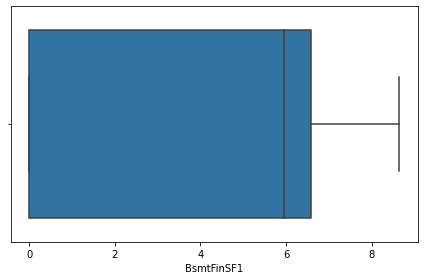

After Removing Outliers


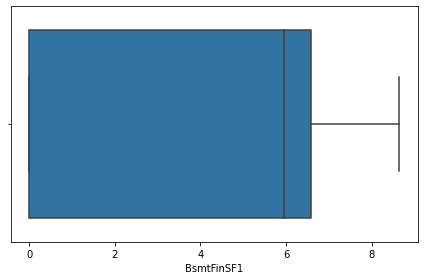

Before Removing Outliers


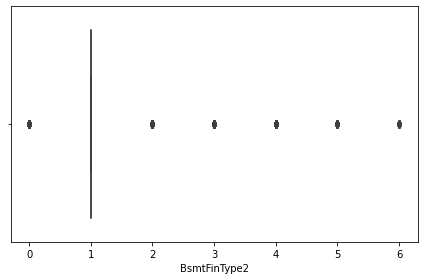

After Removing Outliers


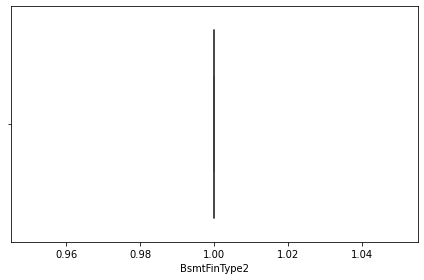

Before Removing Outliers


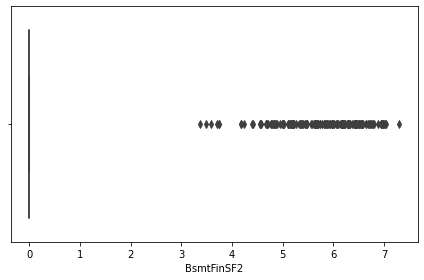

After Removing Outliers


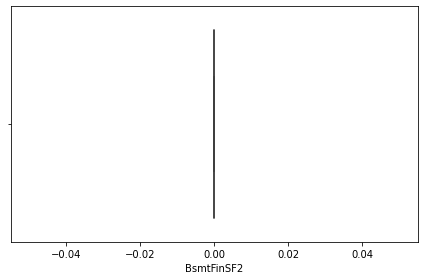

Before Removing Outliers


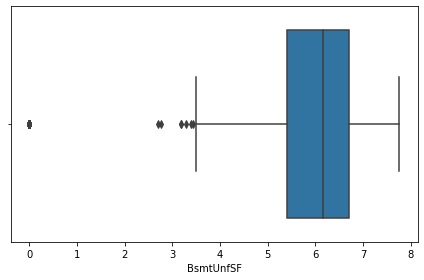

After Removing Outliers


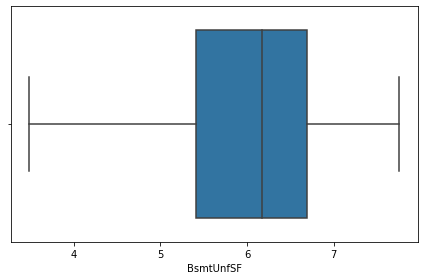

Before Removing Outliers


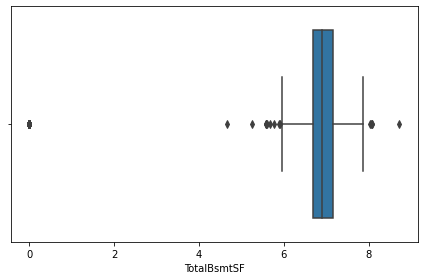

After Removing Outliers


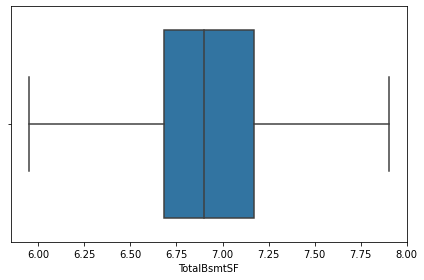

Before Removing Outliers


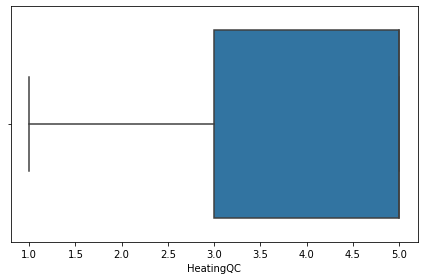

After Removing Outliers


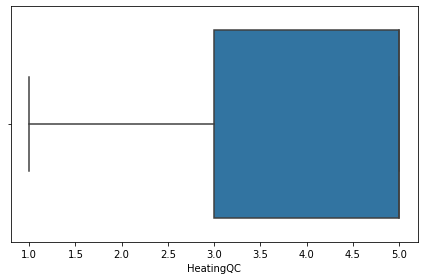

Before Removing Outliers


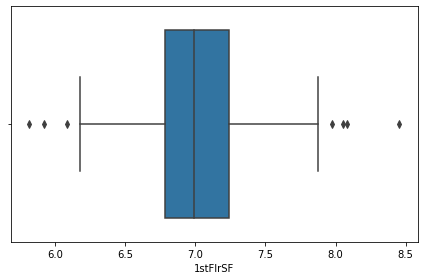

After Removing Outliers


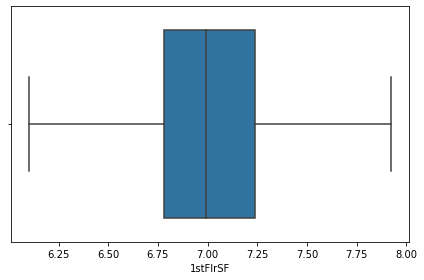

Before Removing Outliers


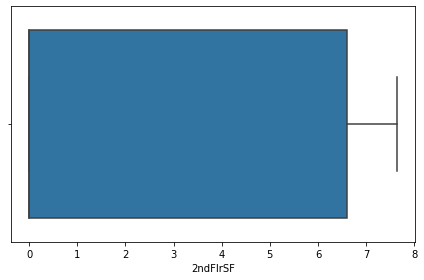

After Removing Outliers


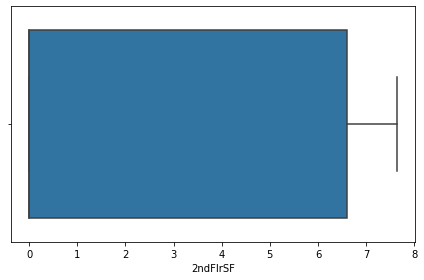

Before Removing Outliers


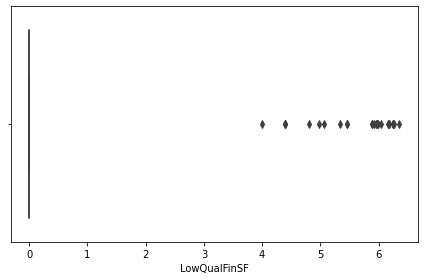

After Removing Outliers


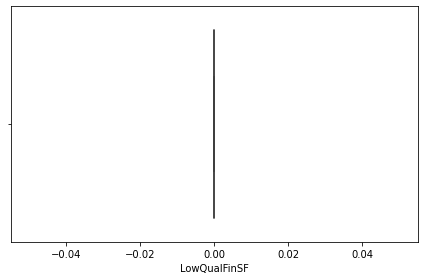

Before Removing Outliers


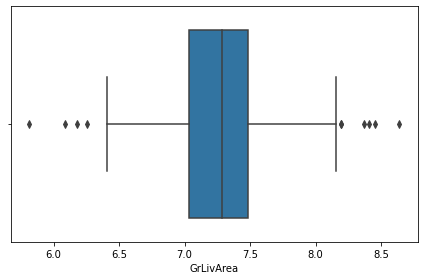

After Removing Outliers


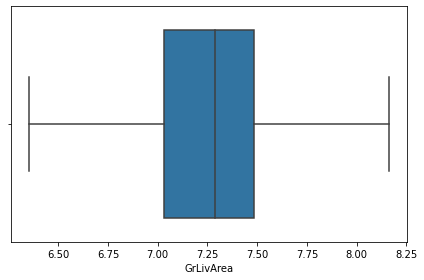

Before Removing Outliers


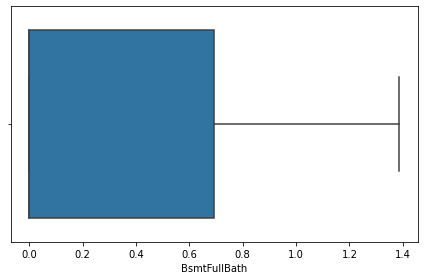

After Removing Outliers


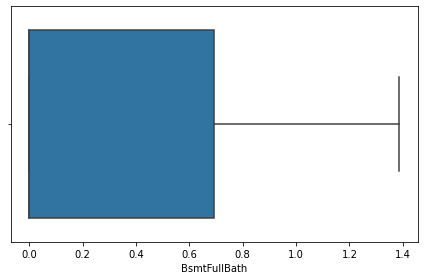

Before Removing Outliers


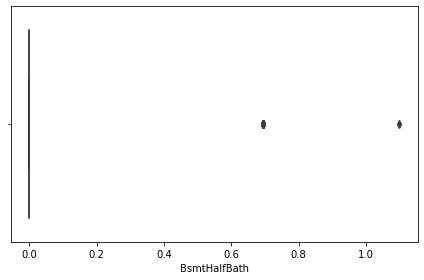

After Removing Outliers


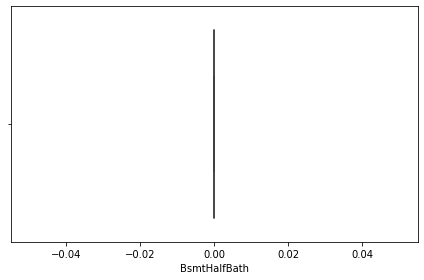

Before Removing Outliers


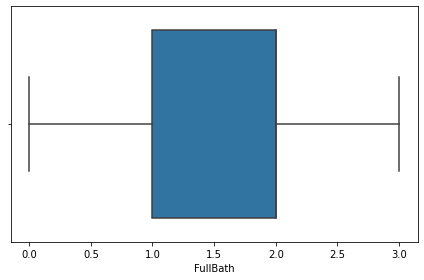

After Removing Outliers


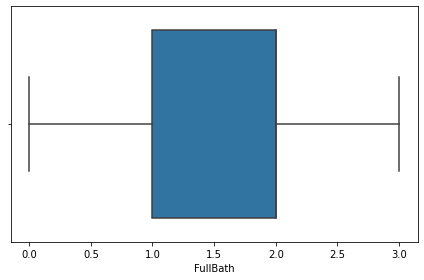

Before Removing Outliers


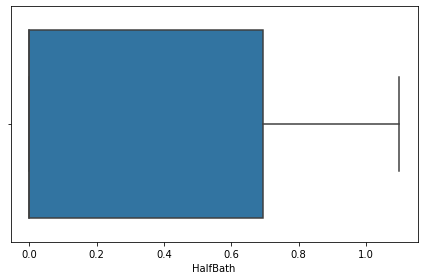

After Removing Outliers


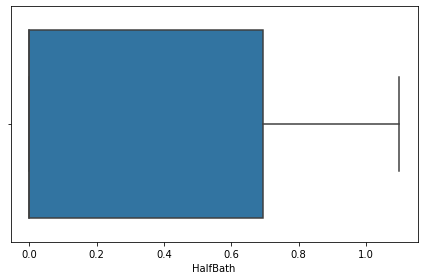

Before Removing Outliers


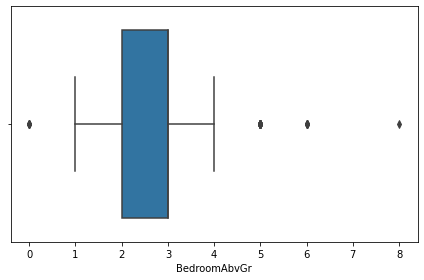

After Removing Outliers


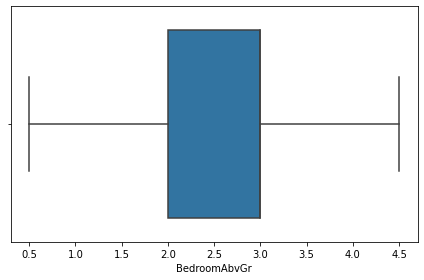

Before Removing Outliers


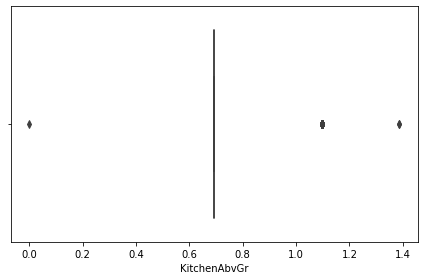

After Removing Outliers


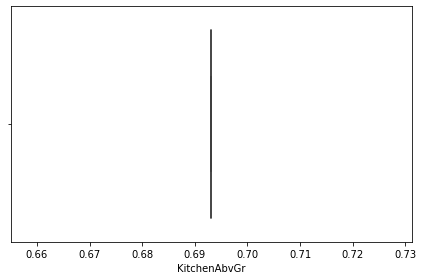

Before Removing Outliers


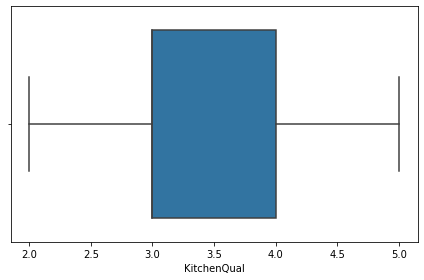

After Removing Outliers


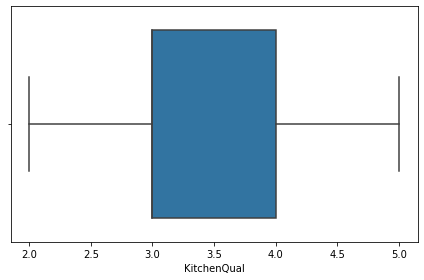

Before Removing Outliers


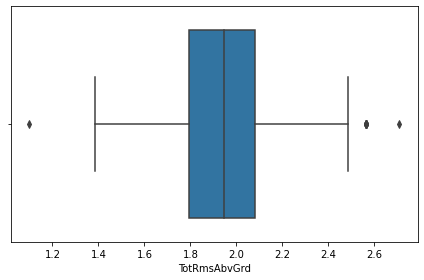

After Removing Outliers


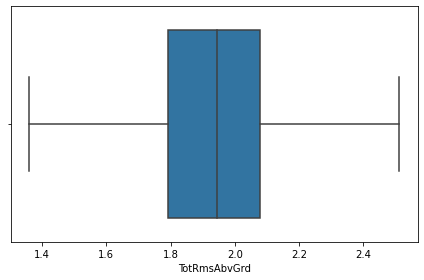

Before Removing Outliers


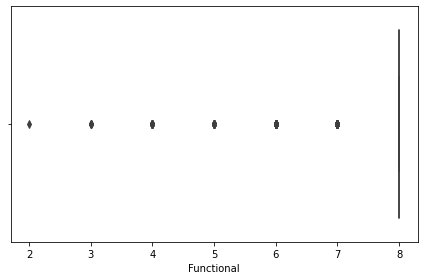

After Removing Outliers


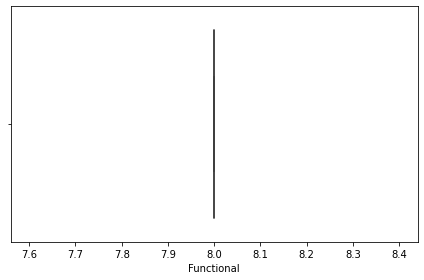

Before Removing Outliers


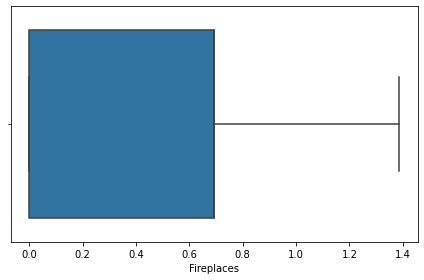

After Removing Outliers


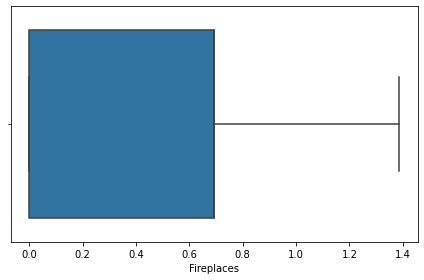

Before Removing Outliers


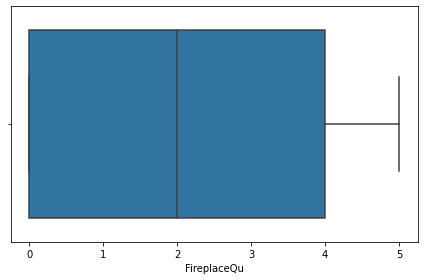

After Removing Outliers


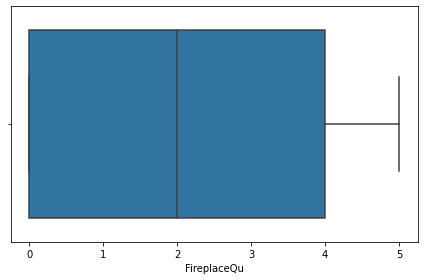

Before Removing Outliers


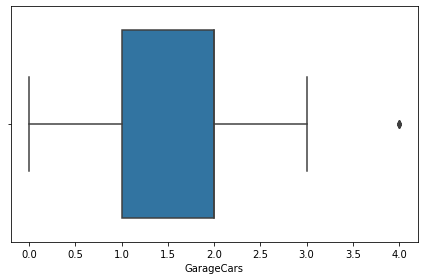

After Removing Outliers


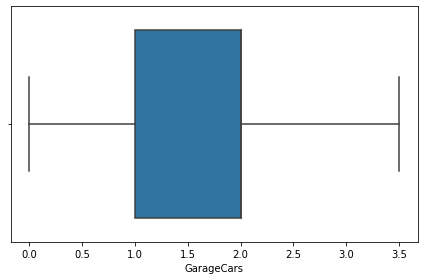

Before Removing Outliers


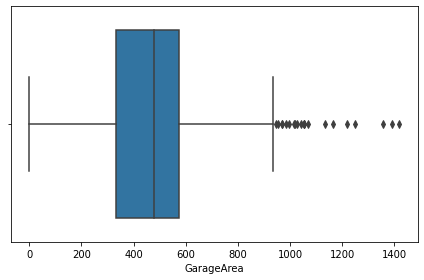

After Removing Outliers


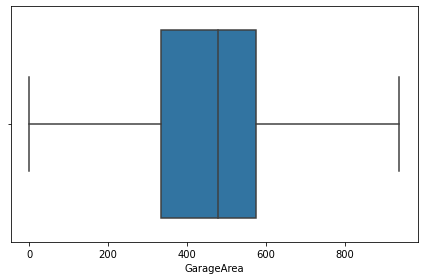

Before Removing Outliers


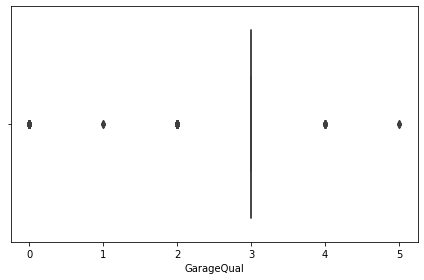

After Removing Outliers


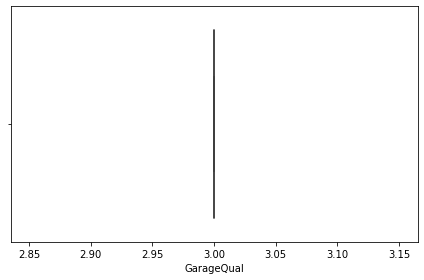

Before Removing Outliers


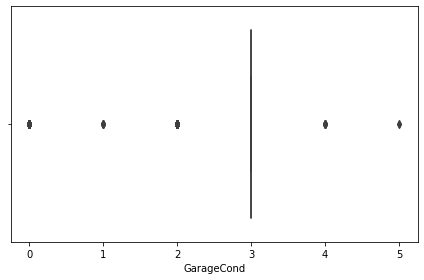

After Removing Outliers


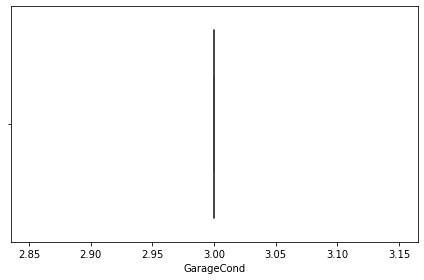

Before Removing Outliers


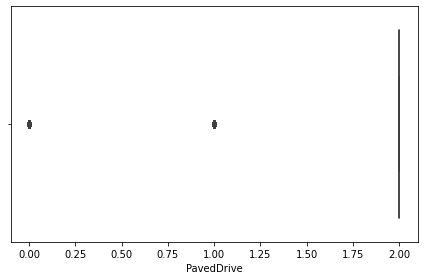

After Removing Outliers


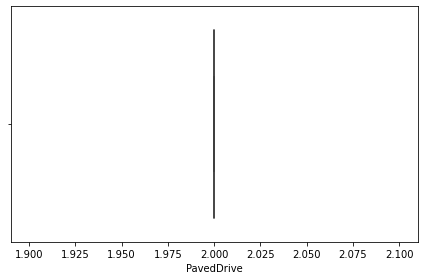

Before Removing Outliers


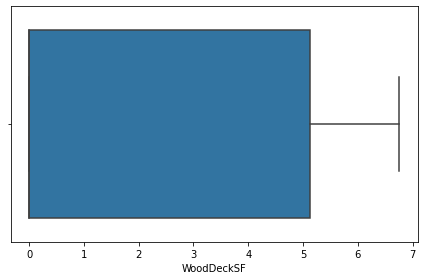

After Removing Outliers


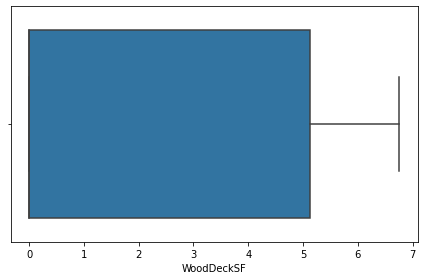

Before Removing Outliers


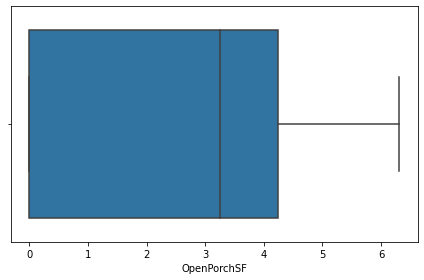

After Removing Outliers


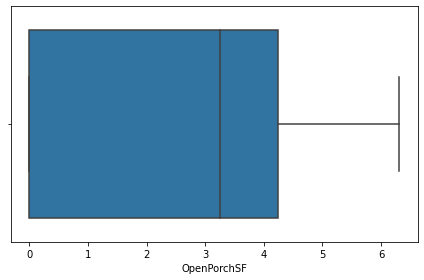

Before Removing Outliers


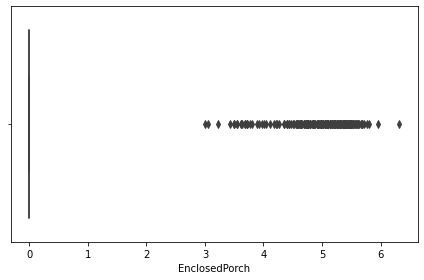

After Removing Outliers


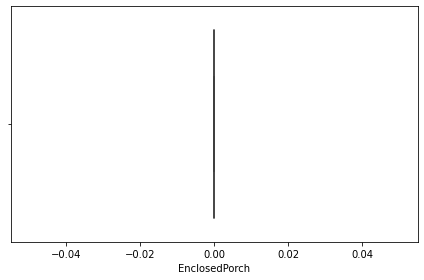

Before Removing Outliers


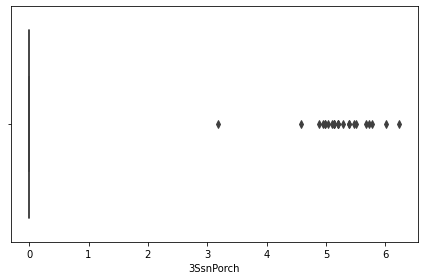

After Removing Outliers


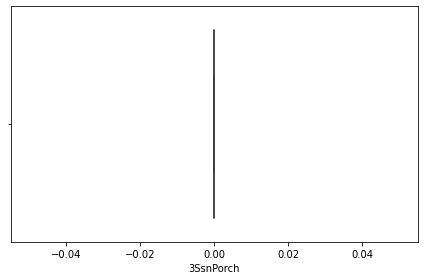

Before Removing Outliers


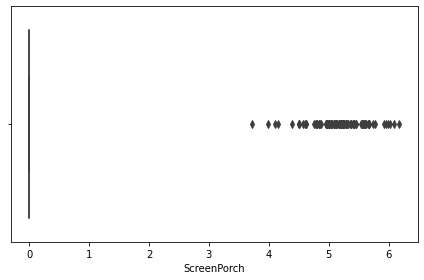

After Removing Outliers


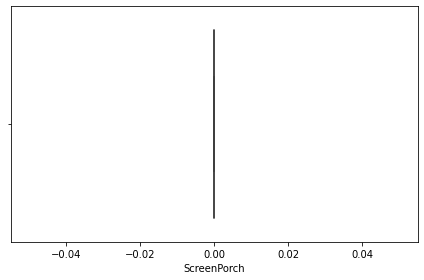

Before Removing Outliers


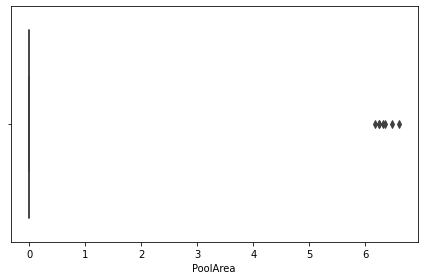

After Removing Outliers


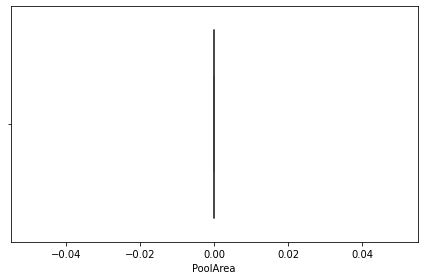

Before Removing Outliers


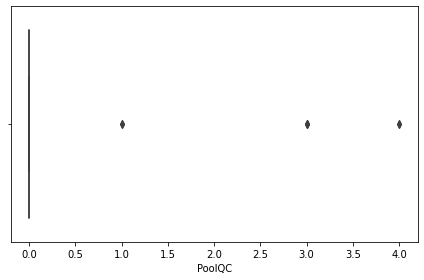

After Removing Outliers


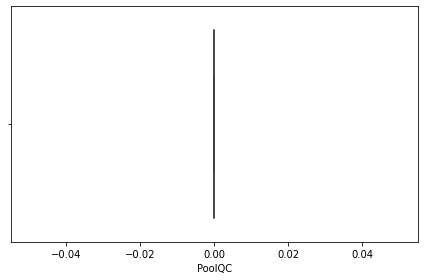

Before Removing Outliers


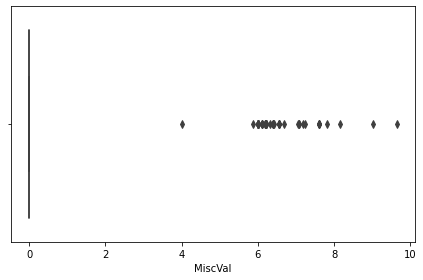

After Removing Outliers


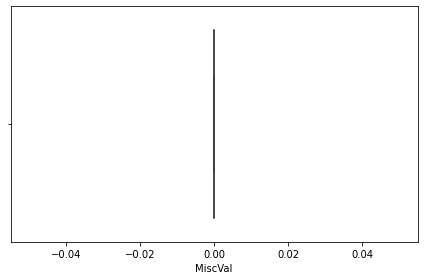

Before Removing Outliers


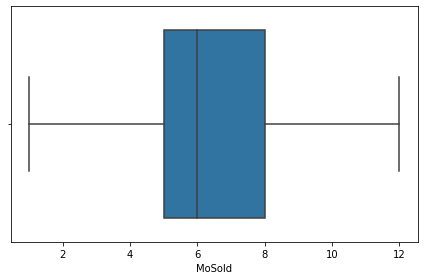

After Removing Outliers


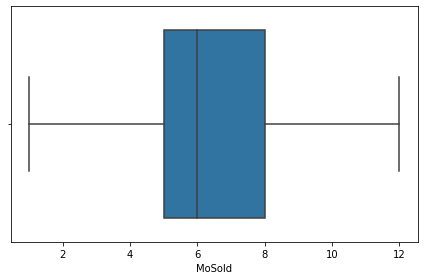

Before Removing Outliers


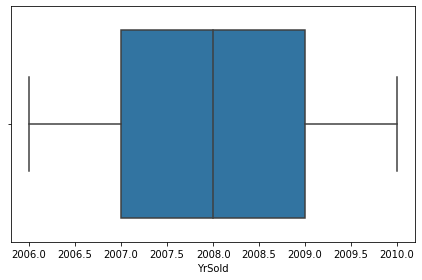

After Removing Outliers


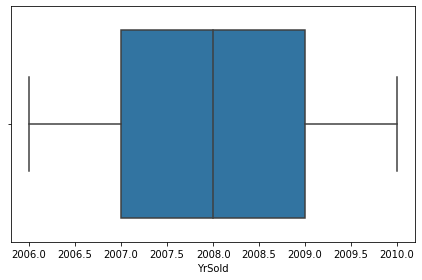

Before Removing Outliers


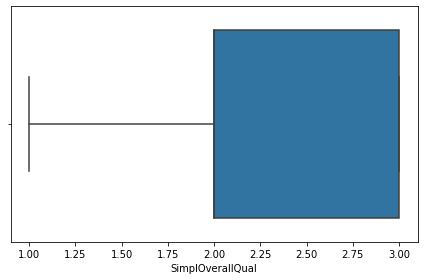

After Removing Outliers


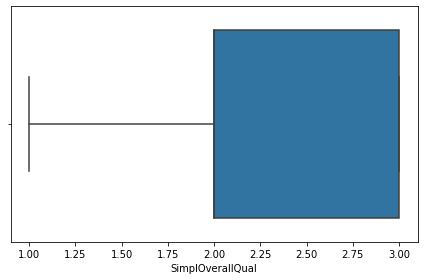

Before Removing Outliers


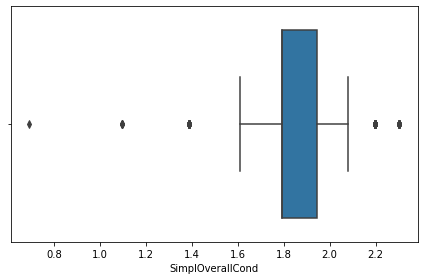

After Removing Outliers


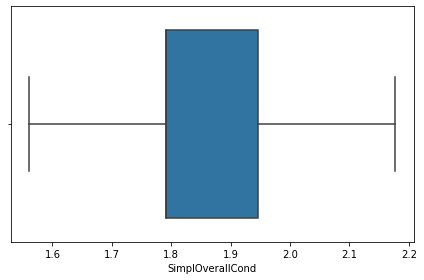

Before Removing Outliers


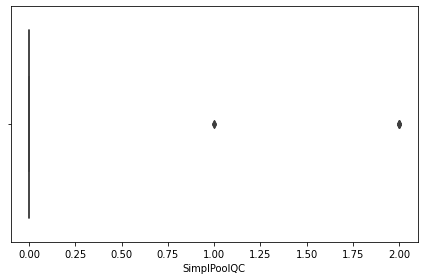

After Removing Outliers


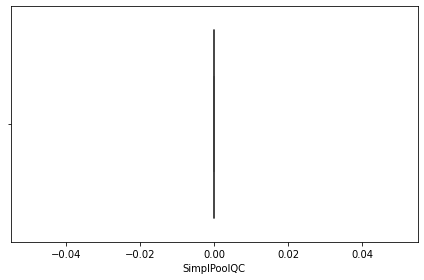

Before Removing Outliers


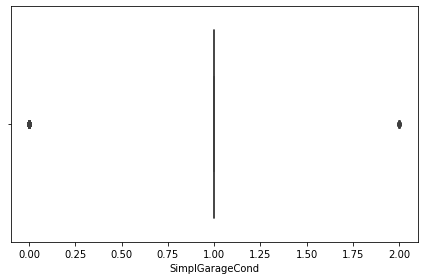

After Removing Outliers


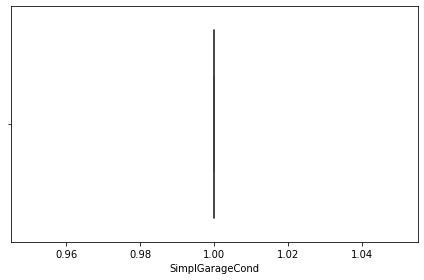

Before Removing Outliers


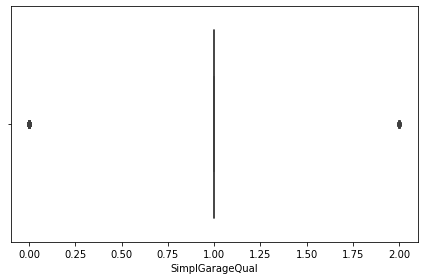

After Removing Outliers


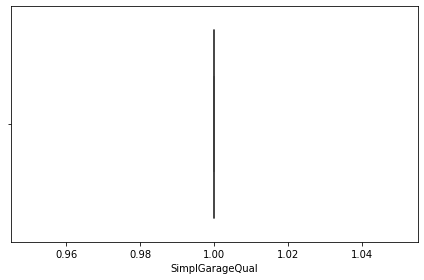

Before Removing Outliers


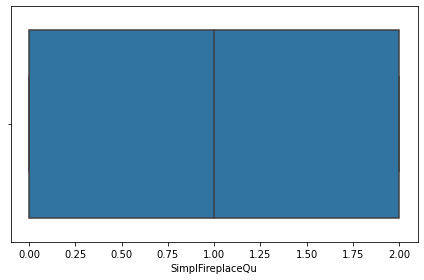

After Removing Outliers


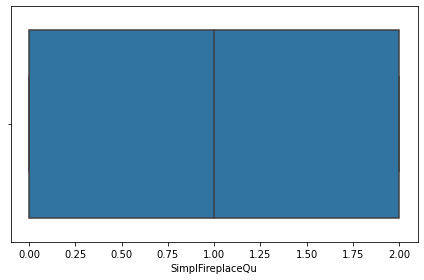

Before Removing Outliers


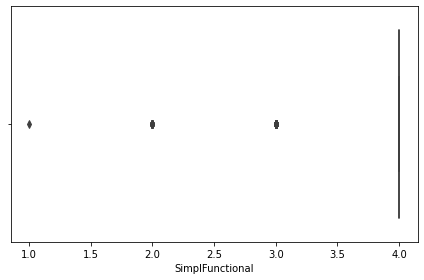

After Removing Outliers


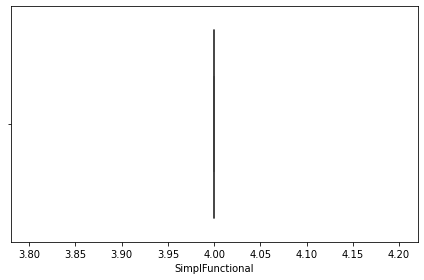

Before Removing Outliers


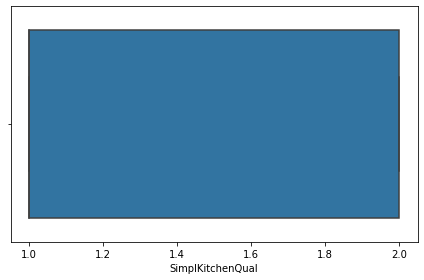

After Removing Outliers


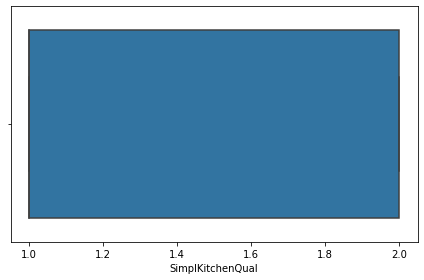

Before Removing Outliers


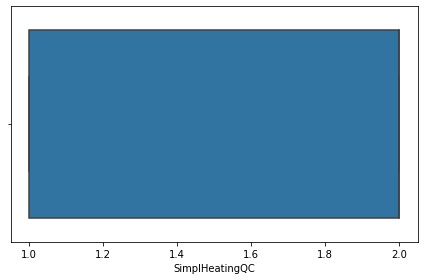

After Removing Outliers


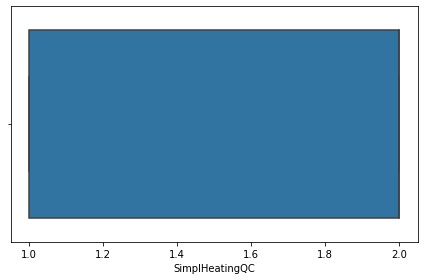

Before Removing Outliers


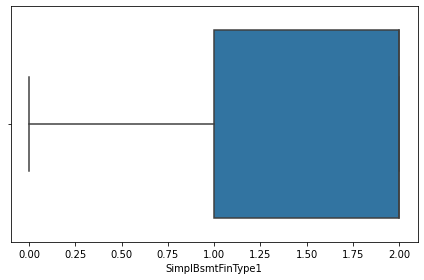

After Removing Outliers


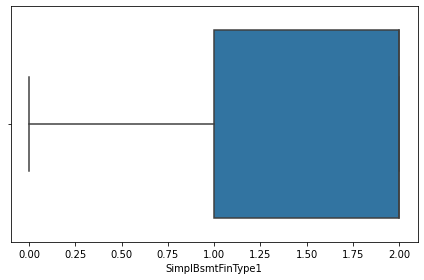

Before Removing Outliers


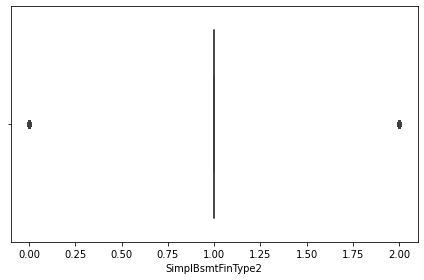

After Removing Outliers


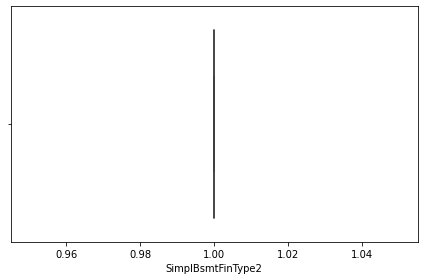

Before Removing Outliers


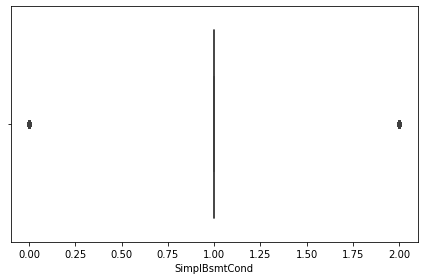

After Removing Outliers


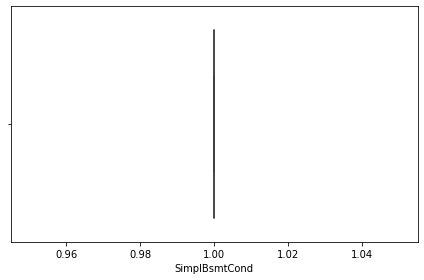

Before Removing Outliers


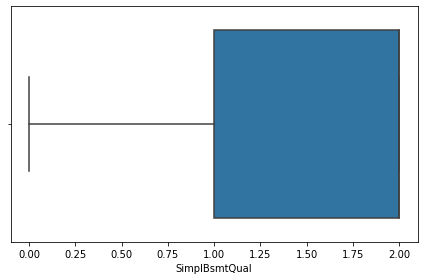

After Removing Outliers


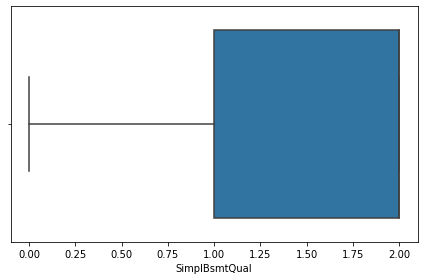

Before Removing Outliers


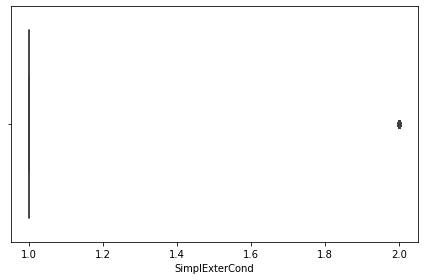

After Removing Outliers


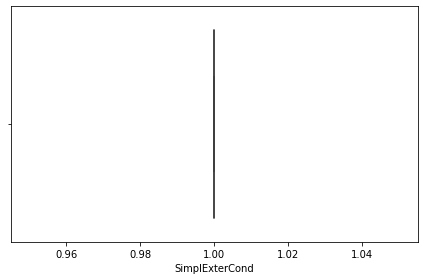

Before Removing Outliers


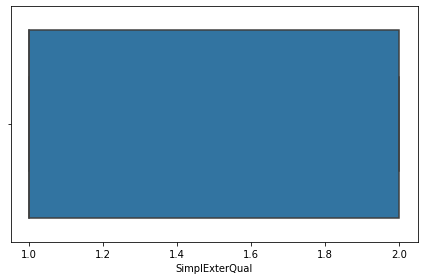

After Removing Outliers


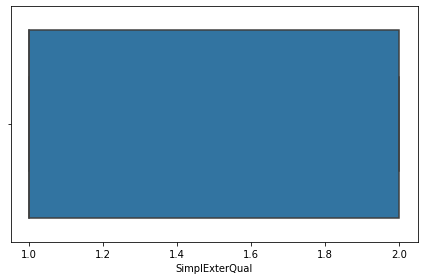

Before Removing Outliers


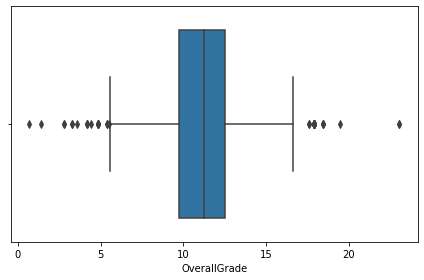

After Removing Outliers


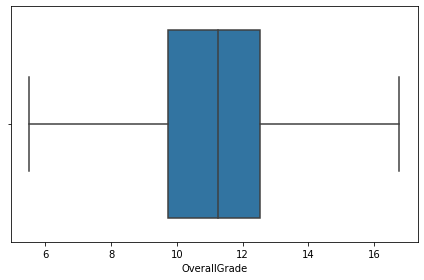

Before Removing Outliers


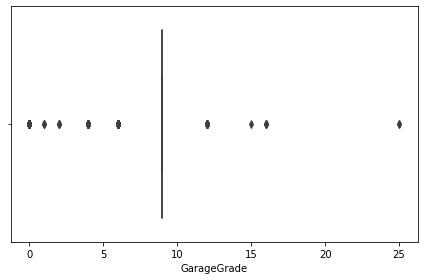

After Removing Outliers


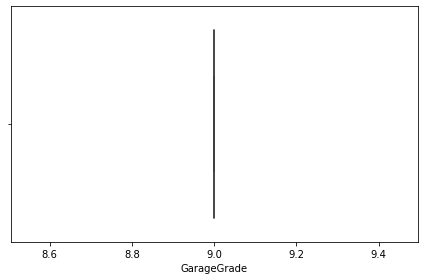

Before Removing Outliers


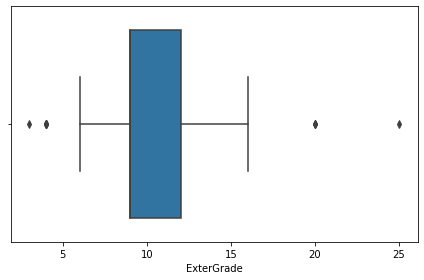

After Removing Outliers


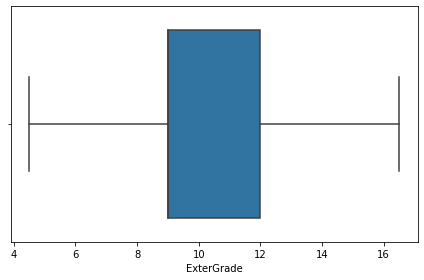

Before Removing Outliers


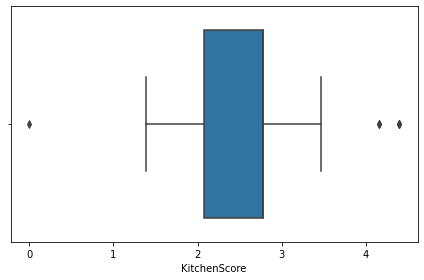

After Removing Outliers


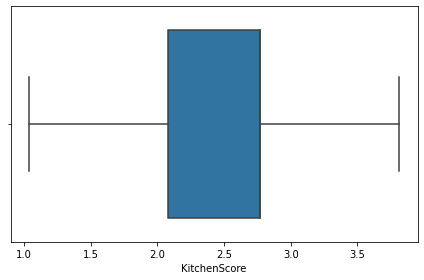

Before Removing Outliers


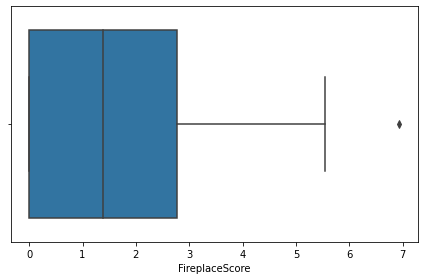

After Removing Outliers


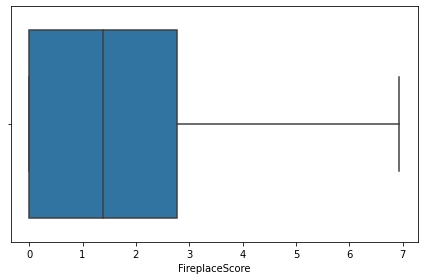

Before Removing Outliers


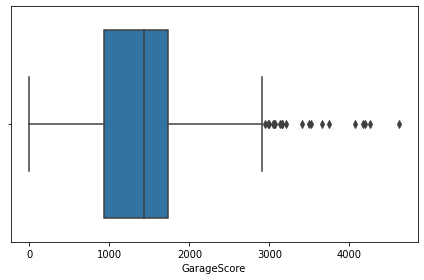

After Removing Outliers


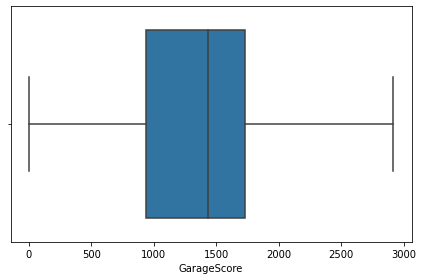

Before Removing Outliers


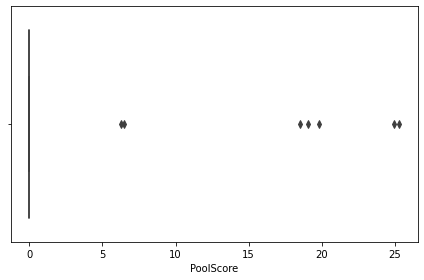

After Removing Outliers


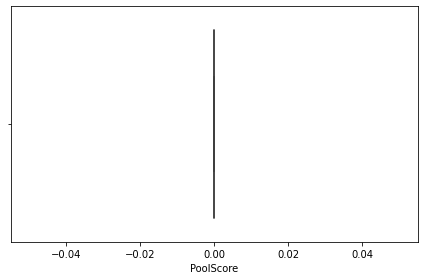

Before Removing Outliers


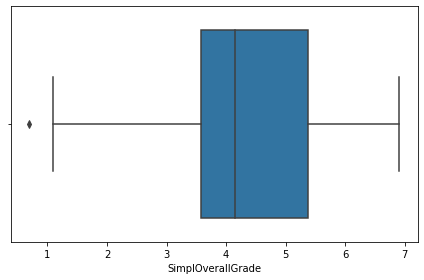

After Removing Outliers


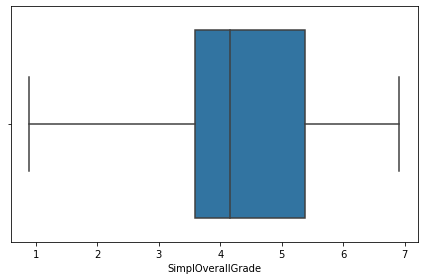

Before Removing Outliers


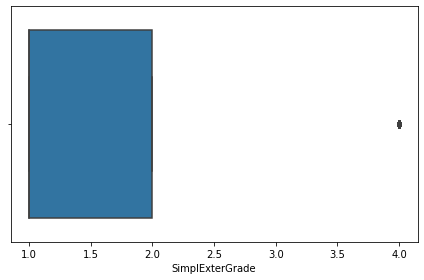

After Removing Outliers


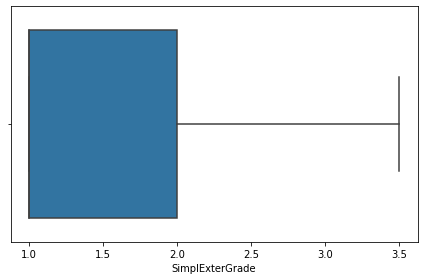

Before Removing Outliers


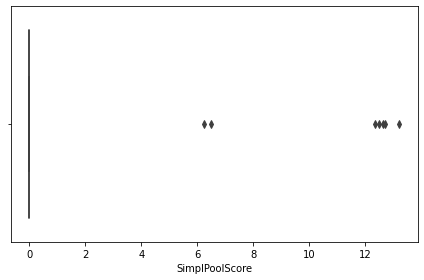

After Removing Outliers


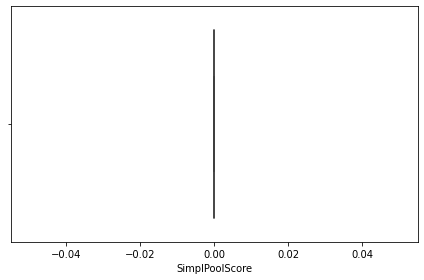

Before Removing Outliers


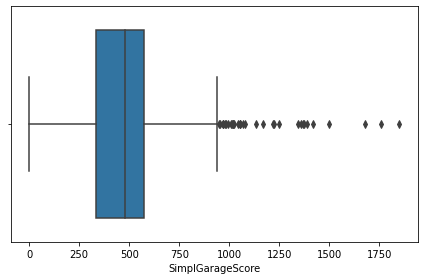

After Removing Outliers


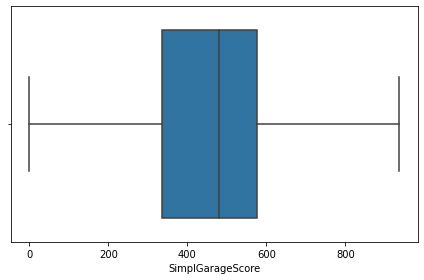

Before Removing Outliers


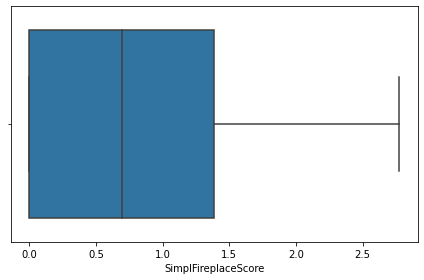

After Removing Outliers


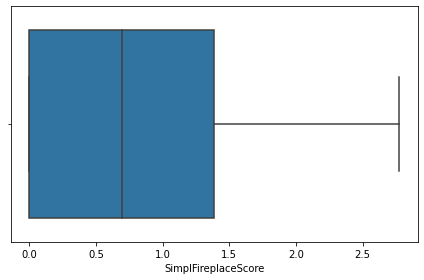

Before Removing Outliers


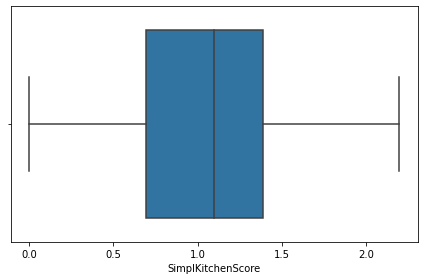

After Removing Outliers


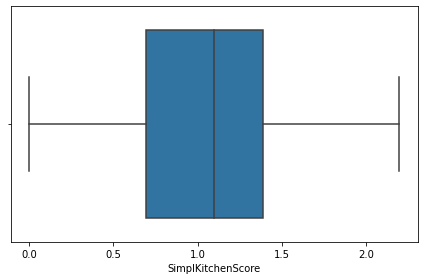

Before Removing Outliers


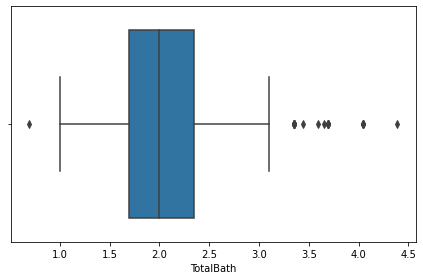

After Removing Outliers


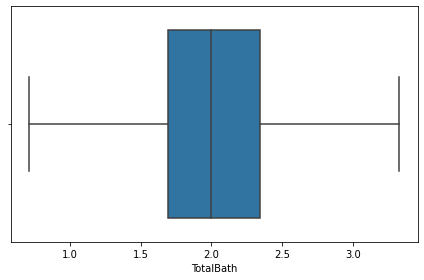

Before Removing Outliers


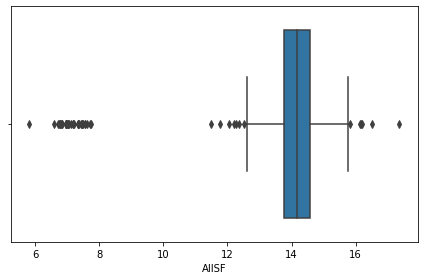

After Removing Outliers


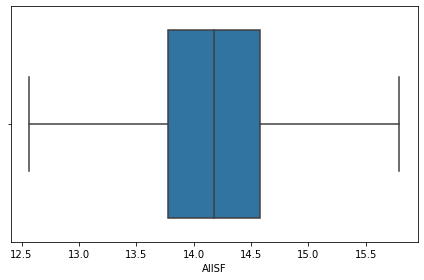

Before Removing Outliers


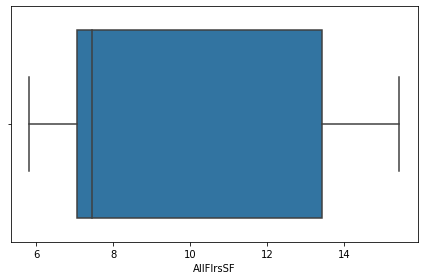

After Removing Outliers


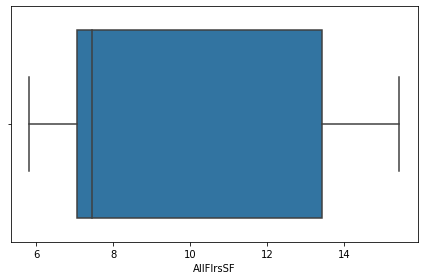

Before Removing Outliers


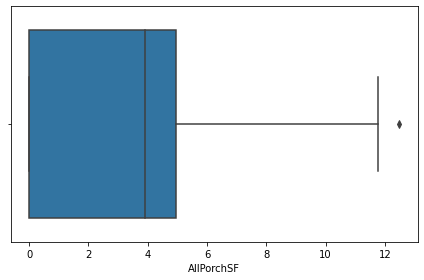

After Removing Outliers


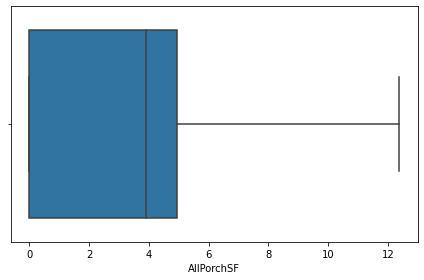

Before Removing Outliers


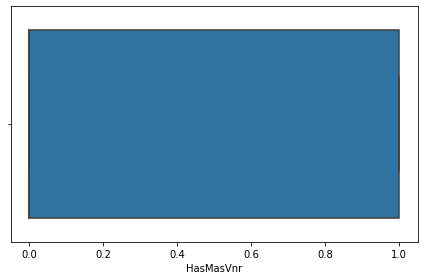

After Removing Outliers


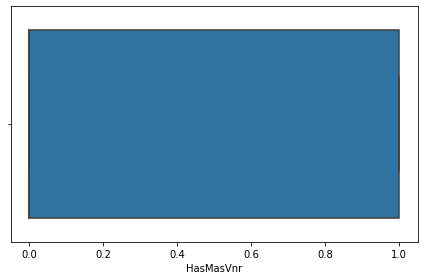

Before Removing Outliers


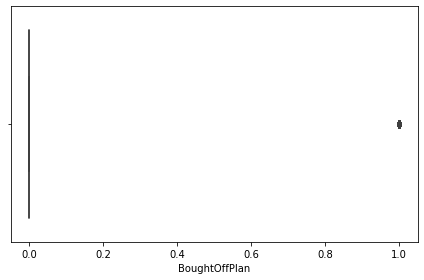

After Removing Outliers


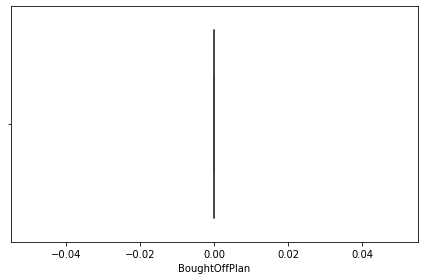

Before Removing Outliers


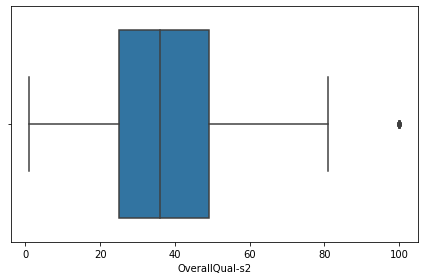

After Removing Outliers


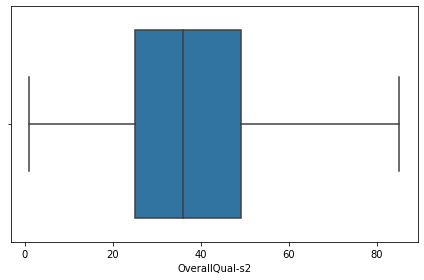

Before Removing Outliers


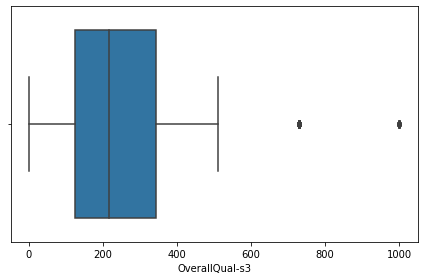

After Removing Outliers


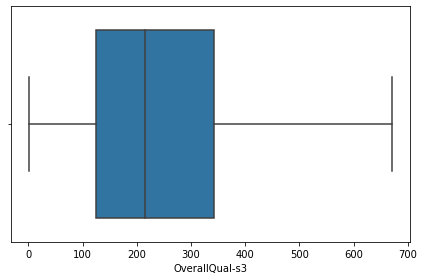

Before Removing Outliers


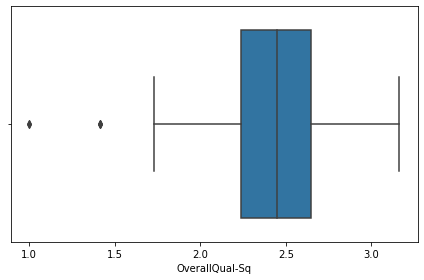

After Removing Outliers


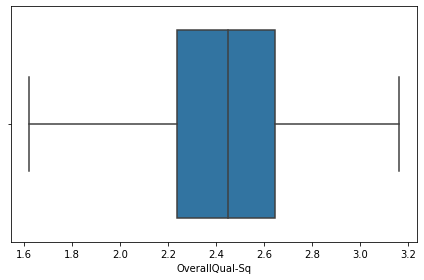

Before Removing Outliers


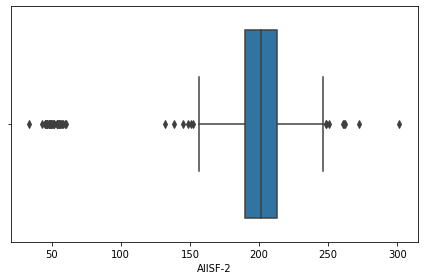

After Removing Outliers


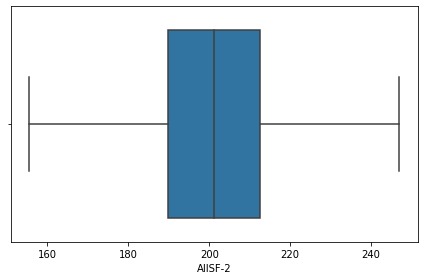

Before Removing Outliers


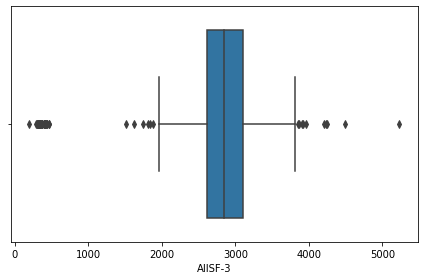

After Removing Outliers


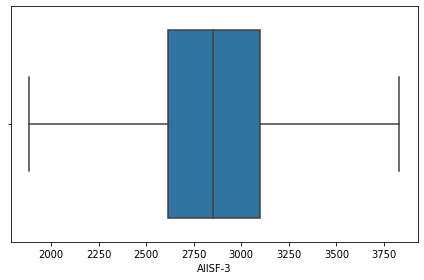

Before Removing Outliers


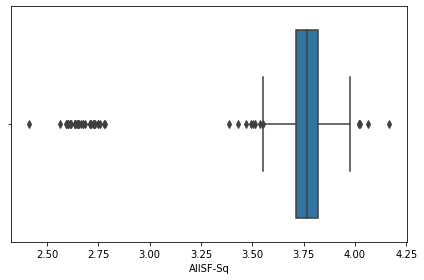

After Removing Outliers


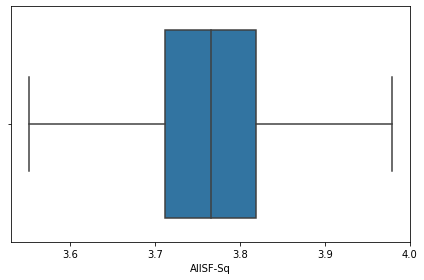

Before Removing Outliers


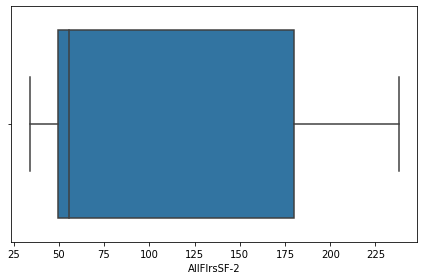

After Removing Outliers


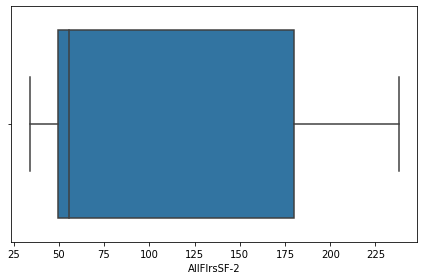

Before Removing Outliers


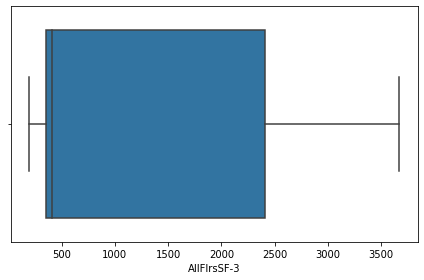

After Removing Outliers


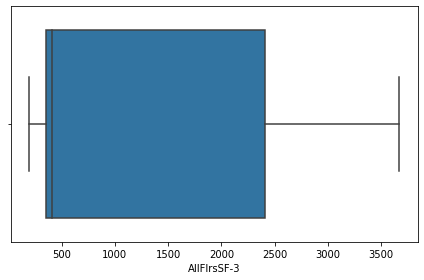

Before Removing Outliers


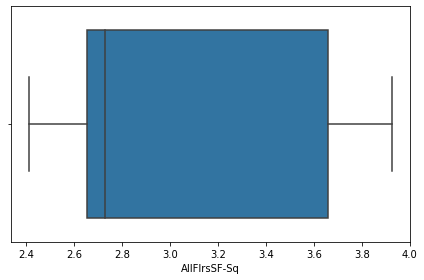

After Removing Outliers


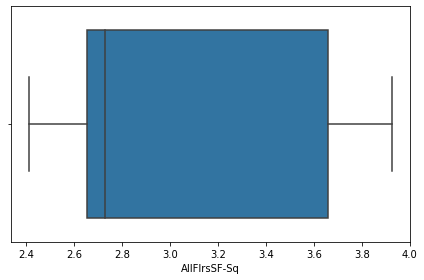

Before Removing Outliers


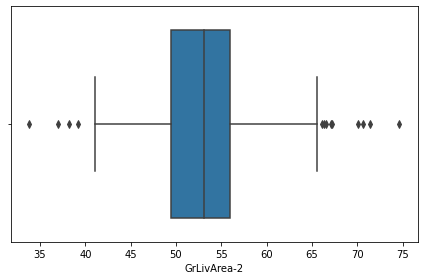

After Removing Outliers


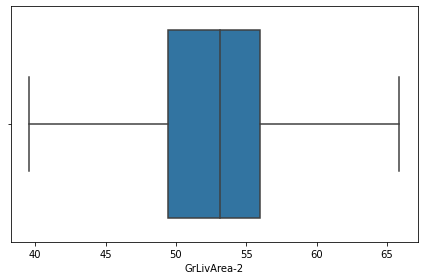

Before Removing Outliers


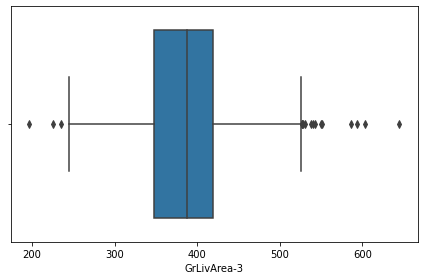

After Removing Outliers


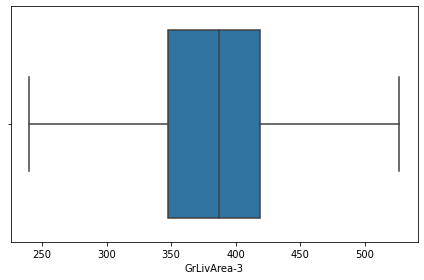

Before Removing Outliers


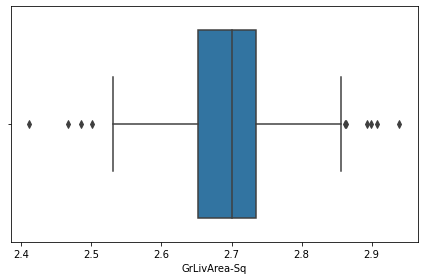

After Removing Outliers


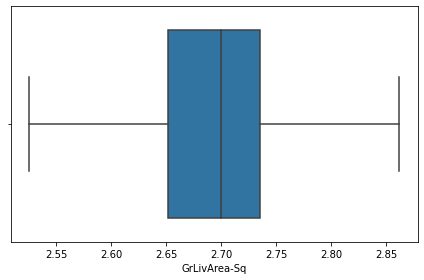

Before Removing Outliers


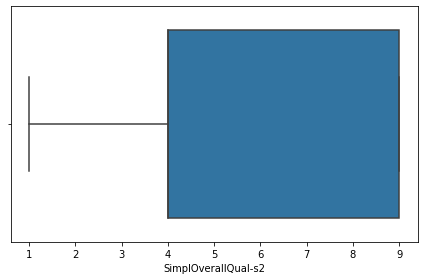

After Removing Outliers


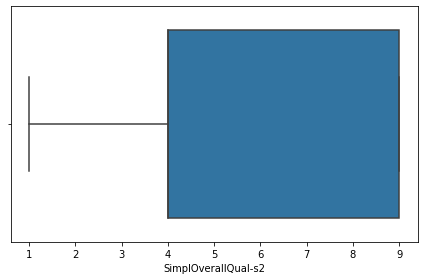

Before Removing Outliers


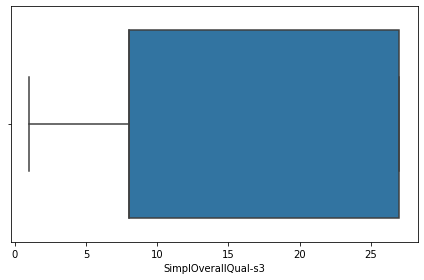

After Removing Outliers


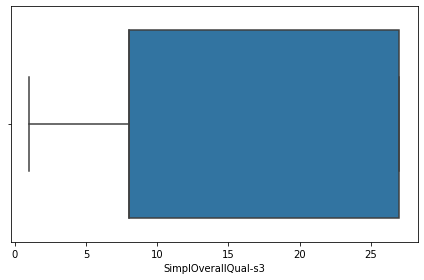

Before Removing Outliers


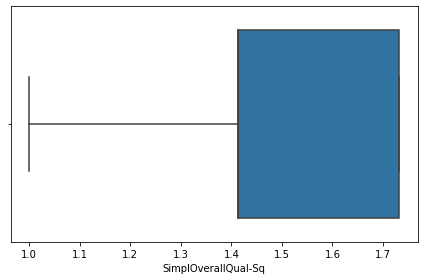

After Removing Outliers


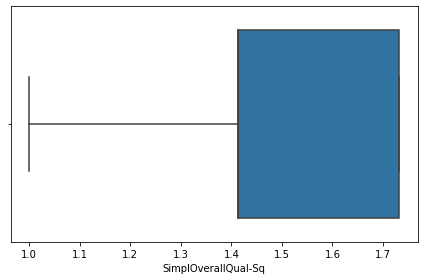

Before Removing Outliers


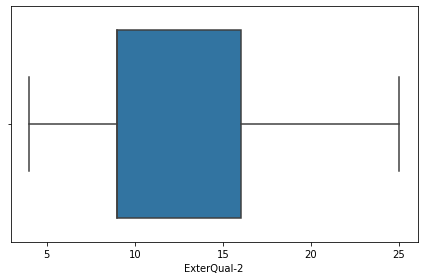

After Removing Outliers


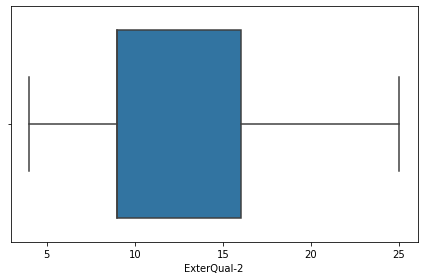

Before Removing Outliers


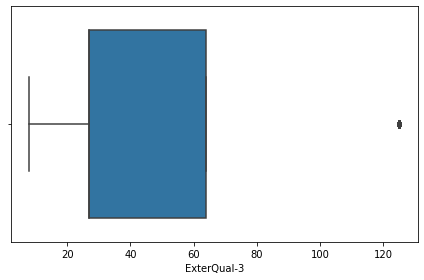

After Removing Outliers


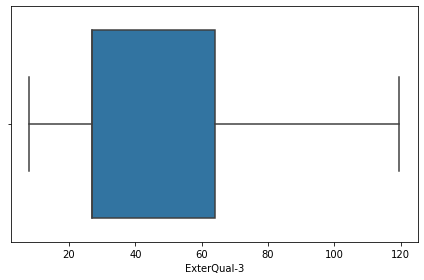

Before Removing Outliers


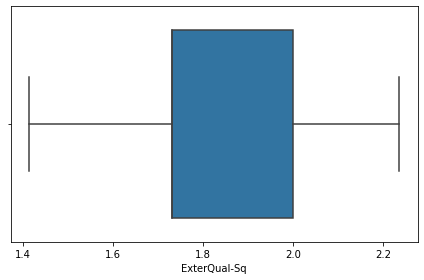

After Removing Outliers


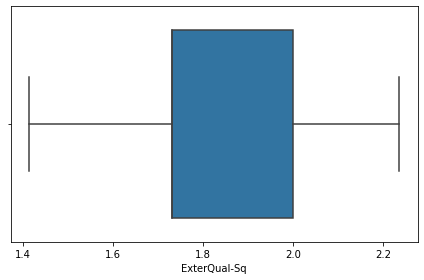

Before Removing Outliers


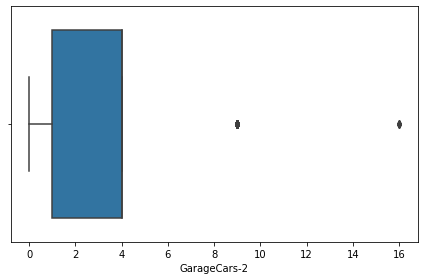

After Removing Outliers


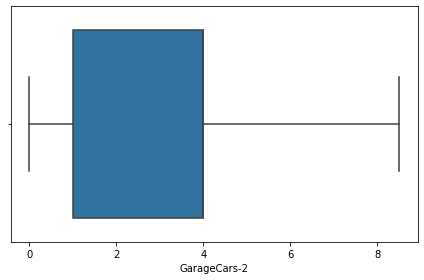

Before Removing Outliers


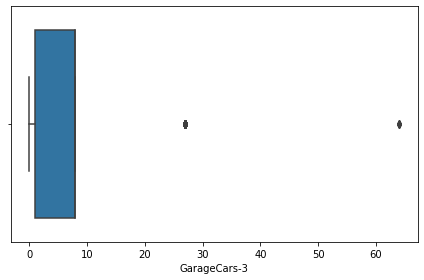

After Removing Outliers


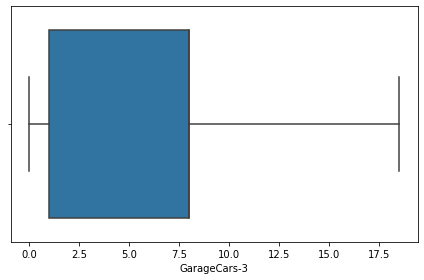

Before Removing Outliers


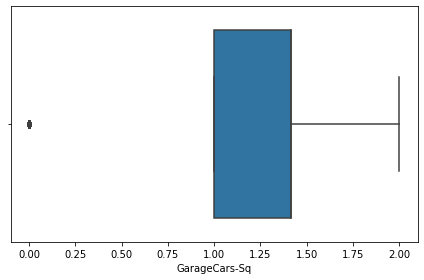

After Removing Outliers


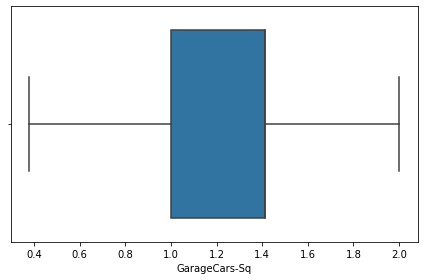

Before Removing Outliers


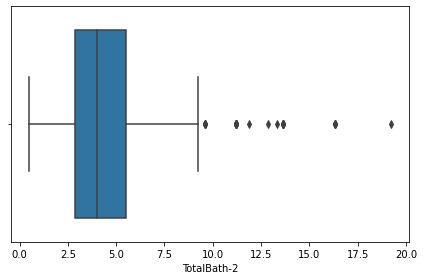

After Removing Outliers


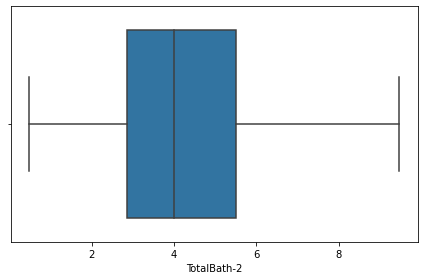

Before Removing Outliers


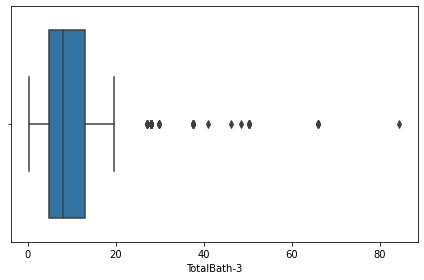

After Removing Outliers


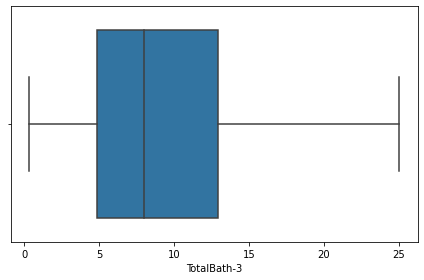

Before Removing Outliers


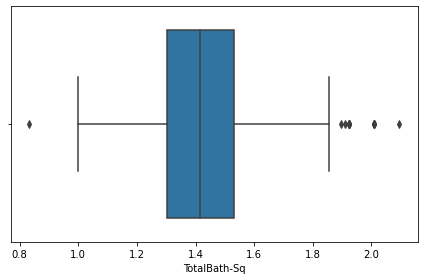

After Removing Outliers


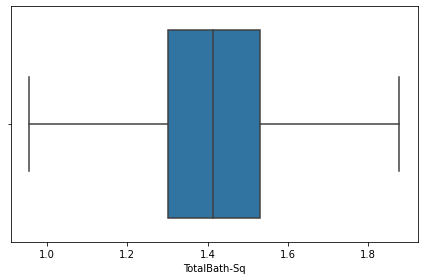

Before Removing Outliers


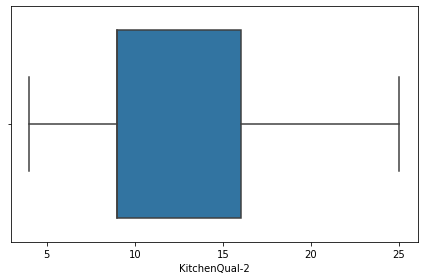

After Removing Outliers


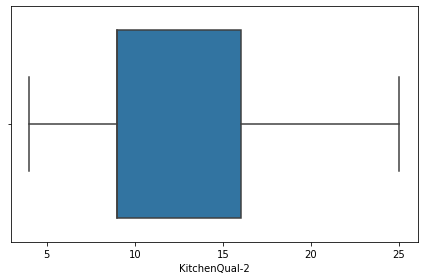

Before Removing Outliers


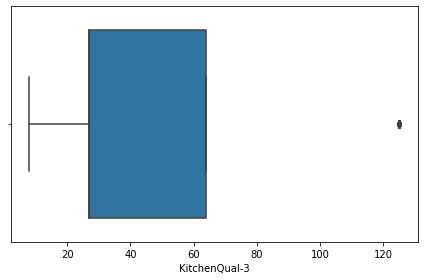

After Removing Outliers


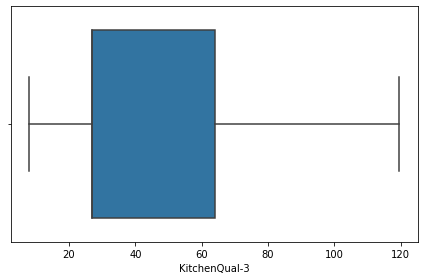

Before Removing Outliers


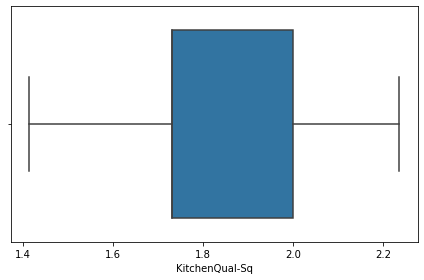

After Removing Outliers


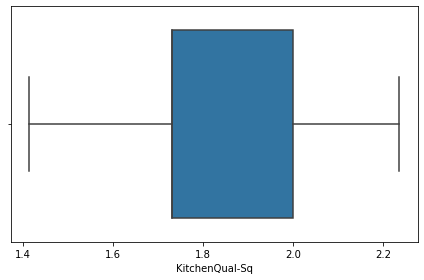

Before Removing Outliers


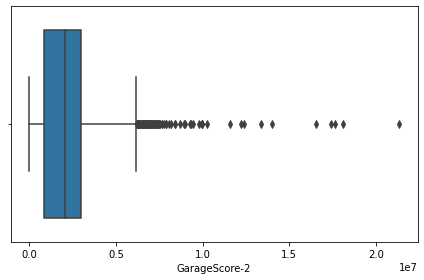

After Removing Outliers


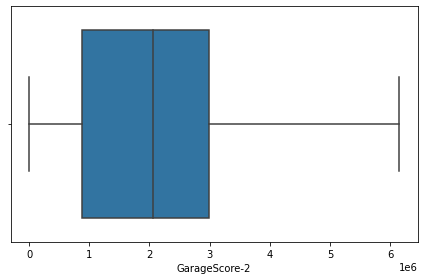

Before Removing Outliers


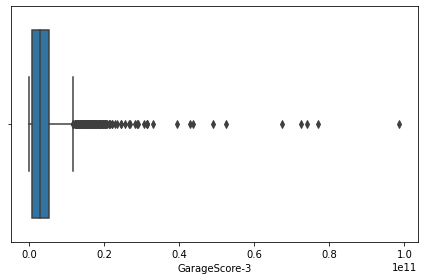

After Removing Outliers


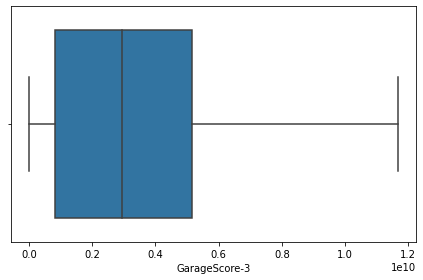

Before Removing Outliers


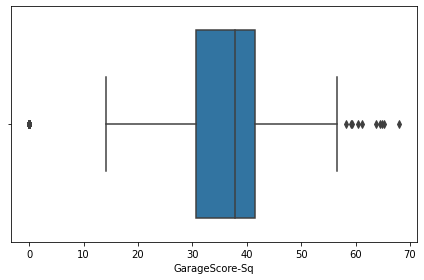

After Removing Outliers


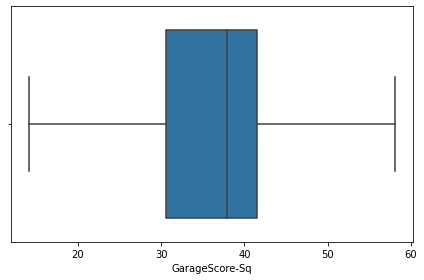

In [34]:
hp_df_num = remove_outliers(hp_df_num)

### Initializing 'variance_inflation_factor()' and backward step wise regression function for House Price Prediction model.

In [35]:
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [36]:
def __varcharProcessing__(X, varchar_process = "dummy_dropfirst"):
    
    dtypes = X.dtypes
    if varchar_process == "drop":   
        X = X.drop(columns = dtypes[dtypes == np.object].index.tolist())
        print("Character Variables (Dropped):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy":
        X = pd.get_dummies(X,drop_first=False)
        print("Character Variables (Dummies Generated):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy_dropfirst":
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    else: 
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    
    X["intercept"] = 1
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = X[cols]
    
    return X

In [37]:
def __backwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):
    
    iterations_log = ""
    last_eleminated = ""    
    cols = X.columns.tolist()

    def regressor(y,X, model_type=model_type):
        if model_type =="linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    for i in range(X.shape[1]):
        if i != 0 :          
            if elimination_criteria == "aic":
                criteria = model.aic
                new_model = regressor(y,X)
                new_criteria = new_model.aic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "bic":
                criteria = model.bic
                new_model = regressor(y,X)
                new_criteria = new_model.bic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "adjr2" and model_type =="linear":
                criteria = model.rsquared_adj
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared_adj
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "r2" and model_type =="linear":
                criteria = model.rsquared
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break   
            else: 
                new_model = regressor(y,X)
            model = new_model
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        else:
            model = regressor(y,X)
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        maxPval = max(model.pvalues)
        cols = X.columns.tolist()
        if maxPval > sl:
            for j in cols:
                if (model.pvalues[j] == maxPval):
                    print("Eliminated :" ,j)
                    iterations_log += str("\n\nEliminated : "+j+ "\n\n")
                    
                    del X[j]
                    last_eleminated = j
        else:
            break
    print(str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic))
    print("Final Variables:", cols)
    iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
    return cols, iterations_log

In [38]:
def backwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
 
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __backwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)

# 6) Modelling to Predict House Price

### Initalizing variables for House Price Prediction

In [39]:
# Find most important features relative to target
print("Find most important features relative to target variable 'sales price'\n")
corr = hp_df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
hp_corr_vars = corr.SalePrice
hp_corr_vars = hp_corr_vars[abs(hp_corr_vars) > 0.3]

print("There is {} strongly correlated variables with SalePrice:\n \n{}".format(len(hp_corr_vars), hp_corr_vars))

Find most important features relative to target variable 'sales price'

There is 76 strongly correlated variables with SalePrice:
 
SalePrice          1.000000
OverallQual        0.817185
OverallQual-s2     0.812374
OverallQual-Sq     0.811071
OverallQual-s3     0.793031
                     ...   
BsmtFinType1       0.334803
BoughtOffPlan      0.324471
HalfBath           0.320925
SimplGarageQual    0.311047
PavedDrive         0.304687
Name: SalePrice, Length: 76, dtype: float64


#### Removing features using VIF function before building the model.

In [40]:
model_vars_vif = calculate_vif_(hp_df_num[1:], thresh=10)

dropping 'KitchenQual-3' at index: 114
dropping 'KitchenQual' at index: 35
dropping 'SimplOverallQual' at index: 54
dropping 'ExterQual' at index: 13
dropping 'SimplOverallQual-Sq' at index: 100
dropping 'ExterQual-2' at index: 100
dropping 'SimplOverallCond' at index: 53
dropping 'AllFlrsSF' at index: 81
dropping 'AllSF' at index: 80
dropping 'GrLivArea' at index: 27
dropping 'AllFlrsSF-2' at index: 88
dropping 'AllSF-2' at index: 85
dropping 'GrLivArea-2' at index: 89
dropping 'GarageCars' at index: 37
dropping '2ndFlrSF' at index: 25
dropping 'TotalBath' at index: 76
dropping 'GarageCars-2' at index: 92
dropping 'OverallQual-s2' at index: 79
dropping 'SimplOverallQual-s2' at index: 87
dropping 'TotalBath-2' at index: 92
dropping 'GarageScore' at index: 68
dropping 'OverallQual' at index: 8
dropping 'AllSF-Sq' at index: 80
dropping 'FireplaceScore' at index: 66
dropping 'GrLivArea-3' at index: 81
dropping 'SimplKitchenQual' at index: 54
dropping 'GarageScore-2' at index: 90
dropping 

#### Creating initial model variables using VIF<10.

In [41]:
hp_df_model_vars = model_vars_vif
hp_df_model_vars["SalePrice"] = hp_df["SalePrice"]
hp_df_model_vars

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallCond,YearBuilt,...,HasMasVnr,BoughtOffPlan,OverallQual-Sq,AllFlrsSF-3,ExterQual-3,GarageCars-3,GarageCars-Sq,KitchenQual-2,GarageScore-3,SalePrice
1,3.044522,80.0,9.169623,2.0,3.0,4.0,4.0,3.0,2.177136,7.589336,...,0,0.0,2.449490,364.184805,27.0,8.0,1.414214,9,2.628072e+09,12.109016
2,4.110874,68.0,9.328212,2.0,3.0,3.0,4.0,3.0,1.791759,7.601902,...,1,0.0,2.645751,2510.187774,64.0,8.0,1.414214,16,6.068404e+09,12.317171
3,4.262680,60.0,9.164401,2.0,3.0,3.0,4.0,3.0,1.791759,7.557995,...,0,0.0,2.645751,2459.488116,27.0,18.5,1.732051,16,7.144451e+09,11.849405
4,4.110874,84.0,9.565284,2.0,3.0,3.0,4.0,3.0,1.791759,7.601402,...,1,0.0,2.828427,2746.576614,64.0,18.5,1.732051,16,1.166941e+10,12.429220
5,3.931826,85.0,9.555064,2.0,3.0,3.0,4.0,3.0,1.791759,7.597898,...,0,0.0,2.236068,2207.773050,27.0,8.0,1.414214,9,2.985984e+09,11.870607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,62.0,8.976894,2.0,3.0,4.0,4.0,3.0,1.791759,7.600902,...,0,0.0,2.449490,2408.569581,27.0,8.0,1.414214,9,2.628072e+09,12.072547
1456,3.044522,85.0,9.486152,2.0,3.0,4.0,4.0,3.0,1.945910,7.590347,...,1,0.0,2.449490,445.459636,27.0,8.0,1.414214,9,3.375000e+09,12.254868
1457,4.262680,66.0,9.109746,2.0,3.0,4.0,4.0,3.0,2.177136,7.571474,...,0,0.0,2.645751,2821.745269,119.5,1.0,1.000000,16,4.320812e+08,12.493133
1458,3.044522,68.0,9.181735,2.0,3.0,4.0,4.0,3.0,1.945910,7.576097,...,0,0.0,2.236068,340.622639,27.0,1.0,1.000000,16,3.732480e+08,11.864469


## 7.1 Multiple Linear Regression using Stepwise Backpropagation.

### Identifying final model using Stepwise Backward Regression using adjr2 and p-value significance.

In [42]:
import random

# splitting the dataset for train and test

# Dependent and Independent Variables
X = hp_df_model_vars.drop(columns= "SalePrice")
y = hp_df_model_vars.SalePrice

random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

# Stepwise Regression using backward regression

final_vars, iterations_logs = backwardSelection(X_train, y_train, model_type="linear", elimination_criteria = "adjr2", sl=0.05)



Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : MSSubClass
Eliminated : Fireplaces
Eliminated : SimplBsmtFinType1
Eliminated : LotFrontage
Eliminated : GarageCars-3
Eliminated : SimplKitchenScore
Eliminated : BedroomAbvGr
Eliminated : MoSold
Eliminated : HasMasVnr
Eliminated : BsmtHalfBath
Eliminated : SimplHeatingQC
Eliminated : WoodDeckSF
Regained :  WoodDeckSF
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     319.1
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:31:46   Log-Likelihood:                 745.16
No. Observations:                1167   AIC:                            -1426.
Df Residuals:                    1135   BIC:     

### The following variables are the final model variables extracted from stepwise regression.

In [43]:
hp_df_trainX = X_train[['LotArea', 'Street', 'Alley', 'LotShape', 'Utilities', 'LandSlope', 'OverallCond', 'YearBuilt', 
                        'YearRemodAdd', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 
                        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'LowQualFinSF', 'BsmtFullBath',
                        'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'GarageQual', 'GarageCond', 
                        'PavedDrive', 'WoodDeckSF', 'OpenPorchSF','YrSold', 'SimplGarageCond', 'SimplGarageQual', 
                        'SimplFunctional','SimplBsmtFinType2', 'SimplBsmtCond', 'SimplBsmtQual', 'SimplExterCond', 
                        'GarageGrade', 'KitchenScore','SimplOverallGrade', 'SimplExterGrade', 'SimplFireplaceScore', 
                        'AllPorchSF', 'OverallQual-Sq', 'AllFlrsSF-3', 'ExterQual-3', 'GarageCars-Sq', 'KitchenQual-2', 
                        'GarageScore-3']]

hp_df_testX = X_test[['LotArea', 'Street', 'Alley', 'LotShape', 'Utilities', 'LandSlope', 'OverallCond', 'YearBuilt', 
                        'YearRemodAdd', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 
                        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'LowQualFinSF', 'BsmtFullBath',
                        'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'GarageQual', 'GarageCond', 
                        'PavedDrive', 'WoodDeckSF', 'OpenPorchSF','YrSold', 'SimplGarageCond', 'SimplGarageQual', 
                        'SimplFunctional','SimplBsmtFinType2', 'SimplBsmtCond', 'SimplBsmtQual', 'SimplExterCond', 
                        'GarageGrade', 'KitchenScore','SimplOverallGrade', 'SimplExterGrade', 'SimplFireplaceScore', 
                        'AllPorchSF', 'OverallQual-Sq', 'AllFlrsSF-3', 'ExterQual-3', 'GarageCars-Sq', 'KitchenQual-2', 
                        'GarageScore-3']]

# Verify the shape(number of records) after split

print("X_train shape:", hp_df_trainX.shape)
print("X_test shape:", hp_df_testX.shape)

print("y_train shape:", y_train.shape)
print("y_train shape:", y_test.shape)

X_train shape: (1167, 52)
X_test shape: (292, 52)
y_train shape: (1167,)
y_train shape: (292,)


## Training the model using Multiple Regression.

In [44]:
# Building model with statmodels to get summary of the regression output for train model

X_train1 = sm.add_constant(hp_df_trainX)
model_train = sm.OLS(y_train, X_train1)
model_train_fit = model_train.fit()
print(model_train_fit.summary())

# Building model using Scikit-learn
model_train = LinearRegression()
model_train.fit(hp_df_trainX, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     319.1
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:31:46   Log-Likelihood:                 745.16
No. Observations:                1167   AIC:                            -1426.
Df Residuals:                    1135   BIC:                            -1264.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
LotArea                 0.0810    

LinearRegression()

### Prediction of trained model

In [45]:
# Train Prediction

y_train_predict = model_train.predict(hp_df_trainX)
sales_price_actual = sc.exp1(y_train_predict)

## Testing the model using Multiple Regression.

In [46]:
# Building model with statmodels to get summary of the regression output for train model
X_test1 = sm.add_constant(hp_df_testX)
model_test_OLS = sm.OLS(y_test, X_test1)
model_test_fit = model_test_OLS.fit()
print(model_test_fit.summary())

# Building model using Scikit-learn
model_test = LinearRegression()
model_test.fit(hp_df_testX, y_test)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     66.92
Date:                Fri, 13 Aug 2021   Prob (F-statistic):          6.77e-106
Time:                        20:31:46   Log-Likelihood:                 171.24
No. Observations:                 292   AIC:                            -278.5
Df Residuals:                     260   BIC:                            -160.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
LotArea                 0.1413    

LinearRegression()

### Prediction of test model

In [47]:
# Test Prediction

y_test_predict = model_test.predict(hp_df_testX)
sales_price_actual_test = sc.exp1(y_test_predict)

## Validating Assumptions of Linear Regression

### 1. Mean of Residuals

Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero.

In [48]:
# Actual - prediction = residuals

train_prediction = model_train.predict(hp_df_trainX)
residuals = y_train - train_prediction

residuals.describe()

mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.971192893764631e-15


Very close to zero so all good here.

### 2. Check for Homoscedasticity 

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms

Detecting heteroscedasticity:

Graphical Method: plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

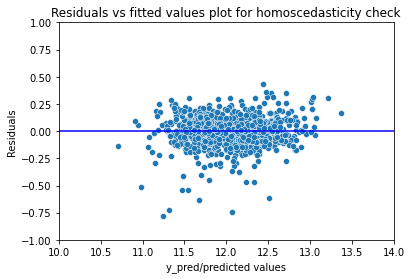

In [49]:
p = sns.scatterplot(train_prediction,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(10,14)
p = sns.lineplot([8,16],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

No pattern observed from the above plot so there is no hetroscedasticity.

### 3. Check for Normality of error terms/residuals

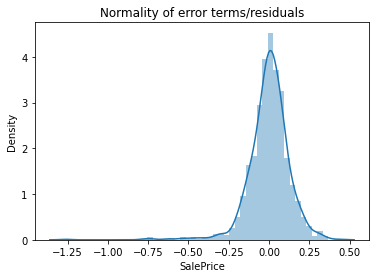

In [50]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [51]:
residuals.describe()

count    1.167000e+03
mean     1.971193e-15
std      1.278324e-01
min     -1.267452e+00
25%     -5.704565e-02
50%      6.778722e-03
75%      6.807795e-02
max      4.352573e-01
Name: SalePrice, dtype: float64

The residual terms are pretty much normally distributed for the number of test points we took. We can observe that, the residual distribution follows a normal distribution with mean close to 0 and a small constant variance.

### 4. No autocorrelation of residuals

When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms.

There should not be autocorrelation in the data so the error terms should not form any pattern.

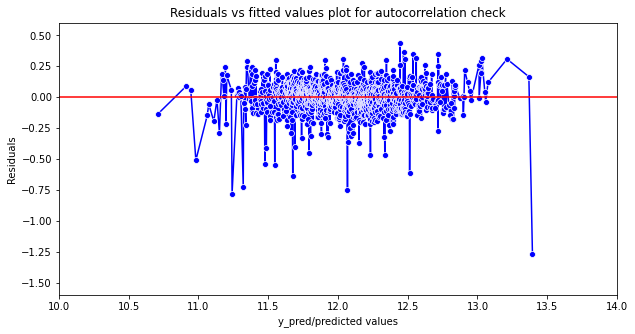

In [52]:
plt.figure(figsize=(10,5))
p = sns.lineplot(train_prediction,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1.6,0.6)
plt.xlim(10,14)
p = sns.lineplot([8,16],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

No patterns were observed from the above chart. Hence no autocorrelation in the final model.

In [53]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(residuals)

2.0127727146437873

The test statistic is 2.012, since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

### 5. Detection of Multicollinearity

In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values.

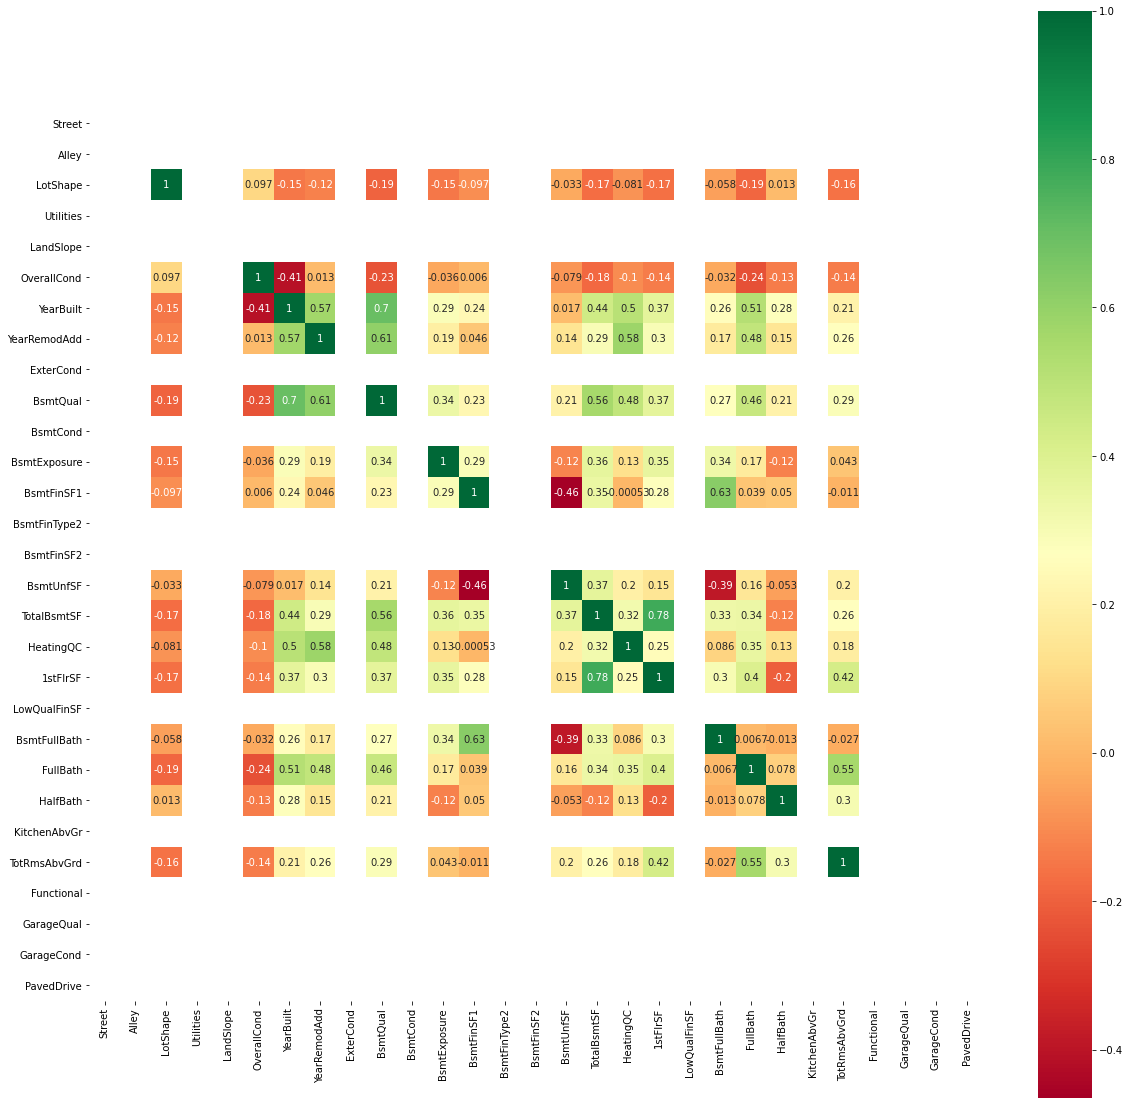

In [54]:
plt.figure(figsize=(20,20))
hp_df_testX1 = hp_df_testX.iloc[:,1:30]
p=sns.heatmap(hp_df_testX1.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

## Evaluating the House Price Prediction Model

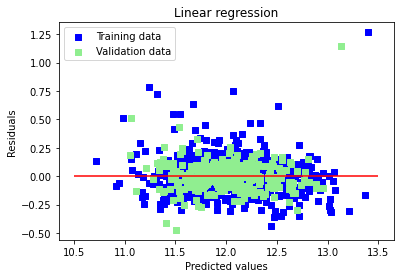

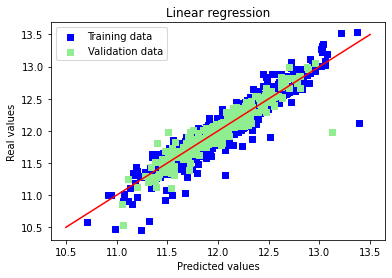

In [55]:
# Define error measure for official scoring : RMSE
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split


scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

# Look at predictions on training and validation set

y_train_pred = model_train.predict(hp_df_trainX)
y_test_pred = model_test.predict(hp_df_testX)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [56]:
def print_evaluate(true, predicted):  
    mae = round(metrics.mean_absolute_error(true, predicted), 3)
    mse = round(metrics.mean_squared_error(true, predicted), 3)
    rmse = round(np.sqrt(metrics.mean_squared_error(true, predicted)), 3)
    r2_square = round(metrics.r2_score(true, predicted), 3)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('_____________________________________')

In [57]:
train_pred_lr = model_train.predict(hp_df_trainX)
test_pred_lr = model_test.predict(hp_df_testX)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred_lr)
print('\nTrain set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred_lr)

cross_val_score_lr = round(cross_val_score(model_test, hp_df_trainX, y_train, cv=10).mean(), 3)

print('\nTrain set Crosss Validation Score:  ', cross_val_score_lr)

Test set evaluation:
_____________________________________
MAE: 0.092
MSE: 0.018
RMSE: 0.135
R2 Square 0.889
_____________________________________

Train set evaluation:
_____________________________________
MAE: 0.087
MSE: 0.016
RMSE: 0.128
R2 Square 0.897
_____________________________________

Train set Crosss Validation Score:   0.887


From the above assumptions testing and evaluation metrics of Multiple Linear Regression using Stepwise Back Propagation Algorithm, we have observed that the house price prediction model using Stepwise Linear Regression satisfies all the statistical significance and assumptions except 'multicollinearity'. 

The large number of independent features of house price prediction causes high correlation between the independent varibales. This leads to muticollinearity, it is clearly evident in the above correlation plot.

Multicollinearity happens when independent variables in the regression model are highly correlated to each other, so it is hard to interpret the house price prediction model and also creates an overfitting problem.

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. 

Whenmulticollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from
the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.
Therefore the model will be more reliable.

Since the model build with Multiple Linear Regression using 'Stepwise Back Propagation Algorithm' contains muticollinearity we choose to build the final model using 'Ridge Regression'.

## House Prediction model  with Ridge Regression

Best alpha : 0.01
Try again for more precision with alphas centered around 0.01
Best alpha : 0.006


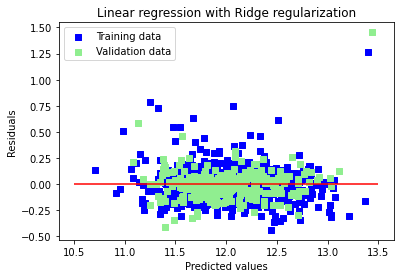

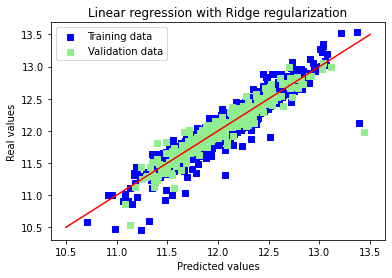

In [58]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])

ridge.fit(hp_df_trainX, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3,alpha * 1.35, alpha * 1.4], cv = 10)

ridge.fit(hp_df_trainX, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

y_train_rdg = ridge.predict(hp_df_trainX)
y_test_rdg = ridge.predict(hp_df_testX)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [59]:
train_pred_ridge = ridge.predict(hp_df_trainX)
test_pred_ridge = ridge.predict(hp_df_testX)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred_ridge)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred_ridge)

cross_val_score_ridge = round(cross_val_score(ridge, hp_df_trainX, y_train, cv=10).mean(), 3)

print('\nTrain set Crosss Validation Score:  ', cross_val_score_ridge)

Test set evaluation:
_____________________________________
MAE: 0.094
MSE: 0.022
RMSE: 0.147
R2 Square 0.867
_____________________________________
Train set evaluation:
_____________________________________
MAE: 0.087
MSE: 0.016
RMSE: 0.128
R2 Square 0.897
_____________________________________

Train set Crosss Validation Score:   0.887


We're getting a much better RMSE result now that we've added L2 penalized. The very small difference between training and test results indicate that we eliminated most of the overfitting. Visually, the graphs seem to confirm that idea.